## **Import Necessary Libraries**

In [ ]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import pickle

import warnings
warnings.filterwarnings("ignore")

## **Data Loading, Exploration and Preprocessing**

### Load Data

In [ ]:
#load train data
#train_df = pd.read_csv("../Datasets/train.csv")
url = "https://raw.githubusercontent.com/sleekyucee/programming4AI/main/Datasets/train.csv"
train_df = pd.read_csv(url)

In [ ]:
#check shape of train data
train_df.shape
print(f"The train data contains {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The train data contains 103904 rows and 25 columns.


In [ ]:
#display first 5 rows
train_df[:5]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Explore & Clean Data

In [ ]:
#display 10 random rows
train_df.sample(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
61664,61664,86719,Female,Loyal Customer,75,Business travel,Eco,247,4,1,...,4,4,4,4,3,4,3,5,0.0,satisfied
28307,28307,40812,Male,Loyal Customer,38,Business travel,Eco,588,3,1,...,3,4,3,3,4,3,3,1,0.0,neutral or dissatisfied
15216,15216,126262,Female,disloyal Customer,34,Business travel,Eco,507,2,2,...,3,3,1,3,4,4,3,0,15.0,neutral or dissatisfied
96411,96411,77498,Female,Loyal Customer,45,Personal Travel,Eco,989,2,2,...,2,2,2,5,1,2,4,0,6.0,neutral or dissatisfied
90733,90733,69409,Male,Loyal Customer,62,Business travel,Business,2767,2,2,...,2,2,2,2,3,2,1,0,0.0,neutral or dissatisfied
66851,66851,123501,Female,disloyal Customer,63,Business travel,Eco,796,2,2,...,3,4,3,3,3,3,3,57,62.0,neutral or dissatisfied
72724,72724,114091,Male,Loyal Customer,36,Personal Travel,Eco,1947,4,4,...,4,3,2,5,3,5,4,20,0.0,satisfied
27709,27709,67740,Female,disloyal Customer,15,Business travel,Eco,1205,1,1,...,3,1,5,4,3,3,3,0,0.0,neutral or dissatisfied
41636,41636,44020,Female,Loyal Customer,22,Personal Travel,Eco Plus,397,4,2,...,1,4,1,4,2,3,1,0,0.0,satisfied
36648,36648,114166,Female,Loyal Customer,32,Business travel,Business,957,1,1,...,4,4,3,5,3,5,4,1,2.0,satisfied


In [ ]:
#display column names
train_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
#the unnamed column look like they have the same values as the index, check count
if train_df["Unnamed: 0"].count()  == train_df["Unnamed: 0"].nunique():
    print(f"The Unnamed column contains {train_df['Unnamed: 0'].nunique()} unique values.")

The Unnamed column contains 103904 unique values.


In [ ]:
#set unnamed column as new index
train_df = train_df.set_index("Unnamed: 0")

#rename index
train_df.index.name = "Index"

In [ ]:
#view changes
train_df.head(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Index,,,,,,,,,,,,,,,,,,,,,
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [ ]:
#replace spaces in column names with underscore _
string = {" ": "_"}
train_df.columns = train_df.columns.str.replace(" ", "_", regex=True)

In [ ]:
#capitalize column names
train_df.columns = train_df.columns.str.title()

In [ ]:
#view changes
train_df.columns

Index(['Id', 'Gender', 'Customer_Type', 'Age', 'Type_Of_Travel', 'Class',
       'Flight_Distance', 'Inflight_Wifi_Service',
       'Departure/Arrival_Time_Convenient', 'Ease_Of_Online_Booking',
       'Gate_Location', 'Food_And_Drink', 'Online_Boarding', 'Seat_Comfort',
       'Inflight_Entertainment', 'On-Board_Service', 'Leg_Room_Service',
       'Baggage_Handling', 'Checkin_Service', 'Inflight_Service',
       'Cleanliness', 'Departure_Delay_In_Minutes', 'Arrival_Delay_In_Minutes',
       'Satisfaction'],
      dtype='object')

In [ ]:
#check info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer_Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type_Of_Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight_Distance                    103904 non-null  int64  
 7   Inflight_Wifi_Service              103904 non-null  int64  
 8   Departure/Arrival_Time_Convenient  103904 non-null  int64  
 9   Ease_Of_Online_Booking             103904 non-null  int64  
 10  Gate_Location                      103904 non-null  int64  
 11  Food_And_Drink                     103904 no

In [ ]:
#check for missing values in train data
train_df.isnull().sum()

,0
Id,0
Gender,0
Customer_Type,0
Age,0
Type_Of_Travel,0
Class,0
Flight_Distance,0
Inflight_Wifi_Service,0
Departure/Arrival_Time_Convenient,0
Ease_Of_Online_Booking,0


In [ ]:
#view first 5 rows of the column with missing values
train_df["Arrival_Delay_In_Minutes"].head()

,Arrival_Delay_In_Minutes
Index,
0,18.0
1,6.0
2,0.0
3,9.0
4,0.0


In [ ]:
#fill missing values in the column with the mean
train_df["Arrival_Delay_In_Minutes"] = train_df["Arrival_Delay_In_Minutes"].fillna(train_df["Arrival_Delay_In_Minutes"].mean())

In [ ]:
#confirm missing values have been filled
train_df["Arrival_Delay_In_Minutes"].isnull().sum()

0

### Process Data

In [ ]:
#retrieve data types
train_df.dtypes

,0
Id,int64
Gender,object
Customer_Type,object
Age,int64
Type_Of_Travel,object
Class,object
Flight_Distance,int64
Inflight_Wifi_Service,int64
Departure/Arrival_Time_Convenient,int64
Ease_Of_Online_Booking,int64


#### To Numeric

In [ ]:
#check unique values
train_df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#convert unique values to numeric by mapping
train_df.Gender = train_df["Gender"].map({"Male": 0, "Female": 1})
train_df.Gender.unique()

array([0, 1])

In [ ]:
#check unique values
train_df.Customer_Type.unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [ ]:
#convert unique values to numeric by mapping
train_df.Customer_Type = train_df.Customer_Type.map({"Loyal Customer": 0, "disloyal Customer": 1})
train_df.Customer_Type.unique()

array([0, 1])

In [ ]:
#check unique values
train_df.Type_Of_Travel.unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [ ]:
#convert unique values to numeric by mapping
train_df.Type_Of_Travel = train_df.Type_Of_Travel.map({"Personal Travel": 0, "Business travel": 1})
train_df.Type_Of_Travel.unique()

array([0, 1])

In [ ]:
#check unique values
train_df.Class.unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [ ]:
#convert unique values to numeric by mapping
train_df.Class = train_df.Class.map({"Eco Plus": 0, "Business": 1, "Eco": 2})
train_df.Class.unique()

array([0, 1, 2])

In [ ]:
#check unique values
train_df.Satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [ ]:
#convert unique values to numeric by mapping
train_df.Satisfaction = train_df.Satisfaction.map({"neutral or dissatisfied": 0, "satisfied": 1})
train_df.Satisfaction.unique()

array([0, 1])

In [ ]:
#confirm cat data have been mapped to numeric values
train_df.head()

,Id,Gender,Customer_Type,Age,Type_Of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,...,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Satisfaction
Index,,,,,,,,,,,,,,,,,,,,,
0,70172,0,0,13,0,0,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,1,25,1,1,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,0,26,1,1,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,0,25,1,1,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,0,61,1,1,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


#### First Split

Split data into features and target

In [ ]:
#split data
X = train_df.drop("Satisfaction", axis=1)
y = train_df["Satisfaction"]

In [ ]:
#get distribution
y_counts = y.value_counts(normalize=True)
y_counts

,proportion
Satisfaction,
0,0.566667
1,0.433333


In [ ]:
#save class names
class_names = ["Neutral or Dissatisfied", "Satisfied"]

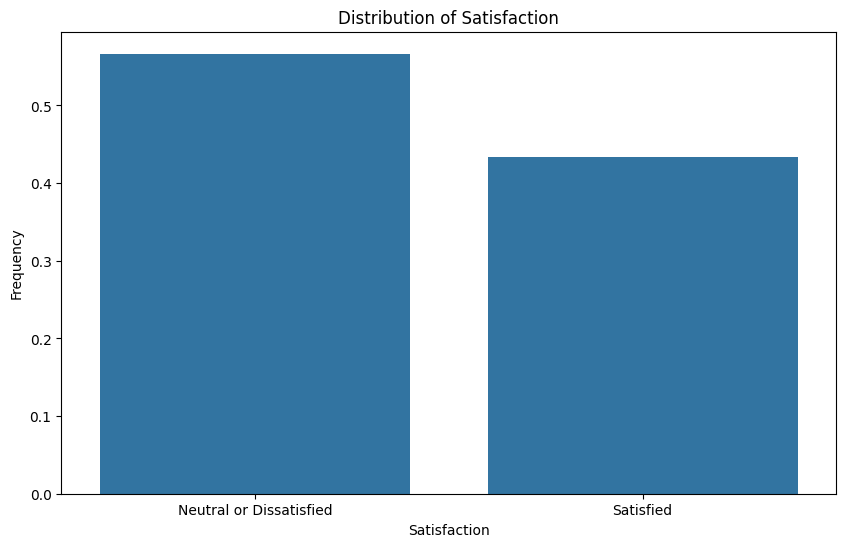

In [ ]:
#plot distribution of target variable
plt.figure(figsize=(10,6))
sns.barplot(x=y_counts.index, y=y_counts.values)
plt.title("Distribution of Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Frequency")
plt.xticks(y_counts.index, class_names)
plt.show()

#### To Numpy

In [ ]:
#convert features to numpy array
X = np.array(X)
X

array([[7.01720e+04, 0.00000e+00, 0.00000e+00, ..., 5.00000e+00,
        2.50000e+01, 1.80000e+01],
       [5.04700e+03, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 6.00000e+00],
       [1.10028e+05, 1.00000e+00, 0.00000e+00, ..., 5.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [6.88250e+04, 0.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        7.00000e+00, 1.40000e+01],
       [5.41730e+04, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.25670e+04, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
#get dimension
X.ndim

2

In [ ]:
#convert target to numpy array
y = np.array(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#get dimension
y.ndim

1

#### Second Split

Split train data into training and validation sets

In [ ]:
#split into train and validation sets
split = int(0.9 * len(y))

X_train, X_val = np.split(X, [split])
y_train, y_val = np.split(y, [split])

#### Scale Features

In [ ]:
#calculate mean and std dev from X_train
X_mean = np.mean(X_train, axis=0, keepdims=True)
X_std = np.std(X_train, axis=0, keepdims=True)

#standardize X_train
X_train = (X_train - X_mean) / (X_std + 1e-8)

#standardize X_val using the same mean and std dev as X_train
X_val = (X_val - X_mean) / (X_std + 1e-8)

In [ ]:
#display scaled X_train
X_train

array([[ 0.13990071, -1.01602998, -0.47397188, ...,  1.30496693,
         0.26672785,  0.0734888 ],
       [-1.599155  , -1.01602998,  2.1098297 , ..., -1.74385471,
        -0.36046704, -0.23661446],
       [ 1.20418945,  0.98422289, -0.47397188, ...,  1.30496693,
        -0.38660016, -0.39166609],
       ...,
       [-0.15850923,  0.98422289, -0.47397188, ...,  1.30496693,
         8.55092695,  7.95527994],
       [-1.36240309,  0.98422289, -0.47397188, ..., -0.9816493 ,
        -0.38660016, -0.39166609],
       [ 0.39064517, -1.01602998, -0.47397188, ...,  1.30496693,
         0.58032529,  0.40943399]])

In [ ]:
#display scaled X_val
X_val

array([[ 0.64891998,  0.98422289, -0.47397188, ..., -0.21944389,
        -0.38660016, -0.39166609],
       [ 1.26424529,  0.98422289, -0.47397188, ...,  1.30496693,
        -0.38660016, -0.39166609],
       [-1.30248077, -1.01602998,  2.1098297 , ..., -0.9816493 ,
         1.7563157 ,  1.33974377],
       ...,
       [ 0.1039313 , -1.01602998,  2.1098297 , ...,  0.54276152,
        -0.20366831, -0.02987896],
       [-0.28732619,  0.98422289,  2.1098297 , ..., -1.74385471,
        -0.38660016, -0.39166609],
       [-0.06317827, -1.01602998, -0.47397188, ..., -1.74385471,
        -0.38660016, -0.39166609]])

In [ ]:
#check mean to be sure scaling have been applied correctly (approx 0)
print("X_train standardized mean:", np.mean(X_train))
print("X_val standardized mean:", np.mean(X_val))

X_train standardized mean: -1.2481084730380005e-17
X_val standardized mean: -0.0019172796662438821


In [ ]:
#check std to be sure scaling have been applied correctly (approx 1)
print("X_train standardized std:", np.std(X_train))
print("X_val standardized std:", np.std(X_val))

X_train standardized std: 0.9999999916606014
X_val standardized std: 0.998346571552884


#### Transpose & Reshape

In [ ]:
#transpose X
X_train = X_train.T
X_val = X_val.T

#reshape y
y_train = y_train.reshape(1, -1)
y_val = y_val.reshape(1, -1)

In [ ]:
#confirm changes
display(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(23, 93513)

(23, 10391)

(1, 93513)

(1, 10391)

#### Process Test Data

In [ ]:
#load test data
url = "https://raw.githubusercontent.com/sleekyucee/programming4AI/main/Datasets/test.csv"
test_df = pd.read_csv(url)
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
#set unnamed column as new index
test_df = test_df.set_index("Unnamed: 0")

#rename index
test_df.index.name = "Index"

In [ ]:
#replace spaces in column names with underscore _
string = {" ": "_"}
test_df.columns = test_df.columns.str.replace(" ", "_", regex=True)

In [ ]:
#capitalize column names
test_df.columns = train_df.columns.str.title()

In [ ]:
#check for missing values in test data
test_df.isnull().sum()

,0
Id,0
Gender,0
Customer_Type,0
Age,0
Type_Of_Travel,0
Class,0
Flight_Distance,0
Inflight_Wifi_Service,0
Departure/Arrival_Time_Convenient,0
Ease_Of_Online_Booking,0


In [ ]:
#fill missing values in the column with the mean
test_df["Arrival_Delay_In_Minutes"] = test_df["Arrival_Delay_In_Minutes"].fillna(test_df["Arrival_Delay_In_Minutes"].mean())

In [ ]:
#confirm missing values have been filled
test_df["Arrival_Delay_In_Minutes"].isnull().sum()

0

In [ ]:
#convert unique values to numeric by mapping
test_df.Gender = test_df["Gender"].map({"Male": 0, "Female": 1})
test_df.Gender.unique()

array([1, 0])

In [ ]:
#convert unique values to numeric by mapping
test_df.Customer_Type = test_df.Customer_Type.map({"Loyal Customer": 0, "disloyal Customer": 1})
test_df.Customer_Type.unique()

array([0, 1])

In [ ]:
#convert unique values to numeric by mapping
test_df.Type_Of_Travel = test_df.Type_Of_Travel.map({"Personal Travel": 0, "Business travel": 1})
test_df.Type_Of_Travel.unique()

array([1, 0])

In [ ]:
#convert unique values to numeric by mapping
test_df.Class = test_df.Class.map({"Eco Plus": 0, "Business": 1, "Eco": 2})
test_df.Class.unique()

array([2, 1, 0])

In [ ]:
#convert unique values to numeric by mapping
test_df.Satisfaction = test_df.Satisfaction.map({"neutral or dissatisfied": 0, "satisfied": 1})
test_df.Satisfaction.unique()

array([1, 0])

In [ ]:
#confirm cat data have been mapped to numeric values
test_df.head()

,Id,Gender,Customer_Type,Age,Type_Of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,...,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Satisfaction
Index,,,,,,,,,,,,,,,,,,,,,
0,19556,1,0,52,1,2,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,1,0,36,1,1,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,0,1,20,1,2,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,0,0,44,1,1,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,1,0,49,1,2,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
#split data
X_test = test_df.drop("Satisfaction", axis=1)
y_test = test_df["Satisfaction"]

In [ ]:
#convert features to numpy array
X_test = np.array(X_test)
X_test

array([[1.9556e+04, 1.0000e+00, 0.0000e+00, ..., 5.0000e+00, 5.0000e+01,
        4.4000e+01],
       [9.0035e+04, 1.0000e+00, 0.0000e+00, ..., 5.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2360e+04, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.7675e+04, 1.0000e+00, 0.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.0086e+04, 0.0000e+00, 0.0000e+00, ..., 4.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.4799e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
#convert target to numpy array
y_test = np.array(y_test)
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
#standardize X_test using the same mean and std dev as X_train
X_test = (X_test - X_mean) / (X_std + 1e-8)

In [ ]:
#display scaled X_test
X_test

array([[-1.21171608,  0.98422289, -0.47397188, ...,  1.30496693,
         0.92005585,  0.74537919],
       [ 0.67030936,  0.98422289, -0.47397188, ...,  1.30496693,
        -0.38660016, -0.39166609],
       [-1.40387339, -1.01602998,  2.1098297 , ..., -0.9816493 ,
        -0.38660016, -0.39166609],
       ...,
       [-0.72787807,  0.98422289, -0.47397188, ..., -0.9816493 ,
        -0.38660016, -0.39166609],
       [ 0.67167124, -1.01602998, -0.47397188, ...,  0.54276152,
        -0.38660016, -0.39166609],
       [-0.80467691,  0.98422289, -0.47397188, ..., -1.74385471,
        -0.38660016, -0.39166609]])

In [ ]:
#transpose X_test
X_test = X_test.T

#reshape y_test
y_test = y_test.reshape(1, -1)

## **Activation Functions**

### Sigmoid Function

Here we define the forward and backward pass for sigmoid

In [ ]:
def sigmoid_forward(x):
    sig_forward = 1/(1 + np.exp(-x))

    return sig_forward

def sigmoid_backward(sig_forward):
    sig_derivative = sig_forward * (1 - sig_forward)

    return sig_derivative

In [ ]:
#test sigmoid forward
sig_forward = sigmoid_forward(X_train)
print(sig_forward)

[[0.53491824 0.16809975 0.76926923 ... 0.46045545 0.20385001 0.596438  ]
 [0.26580143 0.26580143 0.72794533 ... 0.72794533 0.72794533 0.26580143]
 [0.38367658 0.89185491 0.38367658 ... 0.38367658 0.38367658 0.38367658]
 ...
 [0.78666972 0.14882398 0.78666972 ... 0.78666972 0.27256465 0.78666972]
 [0.56628942 0.41084651 0.40453601 ... 0.99980667 0.40453601 0.64114225]
 [0.51836394 0.44112083 0.40331629 ... 0.99964932 0.40331629 0.60095215]]


In [ ]:
#test sigmoid backward
sig_derivative = sigmoid_backward(sig_forward)
print(sig_derivative)

[[2.48780716e-01 1.39842223e-01 1.77494084e-01 ... 2.48436229e-01
  1.62295186e-01 2.40699712e-01]
 [1.95151032e-01 1.95151032e-01 1.98040928e-01 ... 1.98040928e-01
  1.98040928e-01 1.95151032e-01]
 [2.36468863e-01 9.64497302e-02 2.36468863e-01 ... 2.36468863e-01
  2.36468863e-01 2.36468863e-01]
 ...
 [1.67820470e-01 1.26675401e-01 1.67820470e-01 ... 1.67820470e-01
  1.98273161e-01 1.67820470e-01]
 [2.45605713e-01 2.42051656e-01 2.40886627e-01 ... 1.93291018e-04
  2.40886627e-01 2.30078865e-01]
 [2.49662766e-01 2.46533244e-01 2.40652260e-01 ... 3.50559038e-04
  2.40652260e-01 2.39808663e-01]]


### ReLu Function

Here we define the forward and backward pass for relu

In [ ]:
def relu_forward(x):
    rel_forward = np.maximum(0, x)

    return rel_forward

def relu_backward(x):
    rel_derivative = np.where(x > 0, 1, 0)

    return rel_derivative

In [ ]:
#test relu forward
rel_forward = relu_forward(X_train)
print(rel_forward)

[[0.13990071 0.         1.20418945 ... 0.         0.         0.39064517]
 [0.         0.         0.98422289 ... 0.98422289 0.98422289 0.        ]
 [0.         2.1098297  0.         ... 0.         0.         0.        ]
 ...
 [1.30496693 0.         1.30496693 ... 1.30496693 0.         1.30496693]
 [0.26672785 0.         0.         ... 8.55092695 0.         0.58032529]
 [0.0734888  0.         0.         ... 7.95527994 0.         0.40943399]]


In [ ]:
#test relu backward
rel_derivative = relu_backward(rel_forward)
print(rel_derivative)

[[1 0 1 ... 0 0 1]
 [0 0 1 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]]


### Softmax Function

Here we define the forward and backward pass for softmax

In [ ]:
def softmax_forward(x):
    #subtract max from x for numerical stability
    x -= np.max(x, axis=0, keepdims=True)

    exp_x_i = np.exp(x)
    sum_exp_x_j = np.sum(exp_x_i, axis=0, keepdims=True)
    soft_forward = exp_x_i/sum_exp_x_j
    return soft_forward

def softmax_backward(x):
    #retrieve classes and samples
    n, m = x.shape
    jacobians = np.zeros((m, n, n))  #shape: (n_samples, n_classes, n_classes)

    for sample_idx in range(m):
        #extract softmax probabilities for a single sample
        y = x[:, sample_idx]

        #compute the Jacobian matrix for this sample
        jacobian = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                #diagonal case
                if i == j:
                    jacobian[i, j] = y[i] * (1 - y[i])
                #off-diagonal case
                else:
                    jacobian[i, j] = -y[i] * y[j]

        #store the Jacobian matrix
        jacobians[sample_idx] = jacobian

    return jacobians

In [ ]:
#test softmax forward
soft_forward = softmax_forward(X_train)
print(soft_forward)

[[3.41280537e-02 8.15159401e-03 8.61522904e-02 ... 1.05872720e-04
  6.89585703e-03 2.62378526e-02]
 [1.07422982e-02 1.46046287e-02 6.91411444e-02 ... 3.31945148e-04
  7.20634356e-02 6.42712924e-03]
 [1.84718351e-02 3.32685697e-01 1.60860947e-02 ... 7.72289950e-05
  1.67659830e-02 1.10517200e-02]
 ...
 [1.09419154e-01 7.05342828e-03 9.52870609e-02 ... 4.57471131e-04
  1.00913093e-02 6.54656046e-02]
 [3.87428752e-02 2.81318237e-02 1.75547916e-02 ... 6.41570139e-01
  1.82967552e-02 3.17179651e-02]
 [3.19351671e-02 3.18409764e-02 1.74660851e-02 ... 3.53637193e-01
  1.82042995e-02 2.67354913e-02]]


In [ ]:
#test softmax backward
jacobian = softmax_backward(X_train)
print(jacobian)

[[[-2.67654560e+00 -2.86533321e+00 -2.20905538e+00 ... -5.52675825e-02
   -1.31227915e+00 -1.54623656e+00]
  [-2.86533321e+00 -7.96765714e+00 -4.31815209e+00 ... -1.08034334e-01
   -2.56517832e+00 -3.02250668e+00]
  [-2.20905538e+00 -4.31815209e+00 -5.15370718e+00 ... -8.32900781e-02
   -1.97764816e+00 -2.33022973e+00]
  ...
  [-5.52675825e-02 -1.08034334e-01 -8.32900781e-02 ... -4.77325214e-02
   -4.94780865e-02 -5.82992011e-02]
  [-1.31227915e+00 -2.56517832e+00 -1.97764816e+00 ... -4.94780865e-02
   -2.25870056e+00 -1.38426222e+00]
  [-1.54623656e+00 -3.02250668e+00 -2.33022973e+00 ... -5.82992011e-02
   -1.38426222e+00 -2.90817985e+00]]

 [[-1.74655522e+01 -1.15937657e+01  0.00000000e+00 ... -1.42932565e+01
   -9.16229280e+00 -8.70292550e+00]
  [-1.15937657e+01 -1.28968584e+01  0.00000000e+00 ... -1.20460767e+01
   -7.72180096e+00 -7.33465520e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-1.42932565e+01 -1.2

## **Drop Out**

Here we define the forward and backward pass for inverted dropout

In [ ]:
#implement inverted drop out
#forward pass
def inverted_dropout_forward(x, p, activation_function):
    #set keep probability
    if not 0 < p <= 1:
        raise ValueError("Probability p must be between 0 and 1.")

    a = activation_function(x)

    #create mask
    mask = (np.random.rand(*a.shape) < p) / p

    #apply mask
    a = a * mask

    return a, mask

#backward pass
def inverted_dropout_backward(dA, mask):
    dA = dA * mask

    return dA

In [ ]:
#test inverted dropout forward
a, mask = inverted_dropout_forward(X_train, 0.5, relu_forward)
print(a)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#test inverted dropout backward
#need to calculate dA during backpropagation
#dA = inverted_dropout_backward(dA, mask)

## **Fully Connected Neural Network 1**

Network One is a fully connected neural network with basic Gradient Descent

In [ ]:
class NeuralNetwork:
    def __init__(self, layer_dims, activations, dropout_probs=None, regularizer=None, reg_lambda=0.001, seed=None):
        if seed is not None:
            np.random.seed(seed)
        assert len(layer_dims) == len(activations) + 1, "Number of activations must match the number of layers minus one."
        self.layer_dims = layer_dims
        self.activations = activations
        self.dropout_probs = dropout_probs if dropout_probs is not None else [1.0] * (len(layer_dims) - 1)
        assert len(self.dropout_probs) == len(self.layer_dims) - 1, "Number of dropout probabilities must match number of hidden layers"
        self.regularizer = regularizer
        self.reg_lambda = reg_lambda
        self.params = self._initialize_weights()

    def _initialize_weights(self):
        params = {}
        for l in range(1, len(self.layer_dims)):
            params[f"W{l}"] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * np.sqrt(2 / self.layer_dims[l - 1])
            params[f"b{l}"] = np.zeros((self.layer_dims[l], 1))
        return params

    def forward(self, X, is_training=True):
        activations = [X]
        caches = []
        A = X
        for i in range(1, len(self.layer_dims)):
            W, b = self.params[f"W{i}"], self.params[f"b{i}"]
            Z = np.dot(W, A) + b
            if self.activations[i - 1] == "sigmoid":
                activation_function = sigmoid_forward
                A = activation_function(Z)
            elif self.activations[i - 1] == "relu":
                activation_function = relu_forward
                A = activation_function(Z)
            elif self.activations[i - 1] == "softmax":
                activation_function = softmax_forward
                A = activation_function(Z)
            else:
                raise ValueError("Unsupported activation function.")

            if is_training and self.dropout_probs[i - 1] < 1.0:
                A, mask = inverted_dropout_forward(Z, self.dropout_probs[i - 1], activation_function)
                caches.append((Z, mask))
            else:
                caches.append(Z)

            activations.append(A)
            if self.activations[i - 1] == "softmax":
                assert np.allclose(np.sum(A, axis=0), 1, atol=1e-6), "Softmax outputs do not sum to 1."

        return A, activations, caches

    def backward(self, X, Y, activations, caches):
        grads = {}
        m = X.shape[1]
        L = len(self.layer_dims) - 1

        #output layer
        activation_output = self.activations[-1]
        if activation_output == "softmax":
            dZ = activations[-1] - Y
        elif activation_output == "sigmoid":
            dZ = (activations[-1] - Y) * activations[-1] * (1 - activations[-1])
        else:
            raise ValueError("Unsupported activation function for output layer.")

        dW = (1 / m) * np.dot(dZ, activations[-2].T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

        if self.regularizer == "L2":
            dW += (self.reg_lambda / m) * self.params[f"W{L}"]
        elif self.regularizer == "L1":
            dW += (self.reg_lambda / m) * np.sign(self.params[f"W{L}"])

        grads[f"dW{L}"] = dW
        grads[f"db{L}"] = db
        dA = np.dot(self.params[f"W{L}"].T, dZ)

        #remaining layers
        for l in reversed(range(1, L)):
            cache = caches[l - 1]
            if isinstance(cache, tuple):  #dropout applied
                Z, mask = cache
                dA = inverted_dropout_backward(dA, mask)

            Z = cache if not isinstance(cache, tuple) else cache[0]
            if self.activations[l - 1] == "relu":
                dZ = dA * relu_backward(Z)
            elif self.activations[l - 1] == "sigmoid":
                dZ = dA * sigmoid_backward(Z)
            elif self.activations[l - 1] == "softmax":
                dZ = dA * softmax_backward(Z)
            else:
                raise ValueError("Unsupported activation function.")

            dW = (1 / m) * np.dot(dZ, activations[l - 1].T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

            if self.regularizer == "L2":
                dW += (self.reg_lambda / m) * self.params[f"W{l}"]
            elif self.regularizer == "L1":
                dW += (self.reg_lambda / m) * np.sign(self.params[f"W{l}"])

            grads[f"dW{l}"] = dW
            grads[f"db{l}"] = db
            dA = np.dot(self.params[f"W{l}"].T, dZ)

        return grads


    def compute_loss(self, Y, Y_pred, output_activation="softmax"):
        m = Y.shape[1]
        assert Y_pred.shape == Y.shape, f"Y_pred shape mismatch: expected {Y.shape}, got {Y_pred.shape}"
        if output_activation == "softmax":
            cross_entropy_loss = -np.mean(np.sum(Y * np.log(Y_pred + 1e-8), axis=0))
        elif output_activation == "sigmoid":
            cross_entropy_loss = -np.mean(Y * np.log(Y_pred + 1e-8) + (1 - Y) * np.log(1 - Y_pred + 1e-8))
        else:
            raise ValueError("Unsupported output activation function. Use 'softmax' or 'sigmoid'.")
        reg_loss = 0
        if self.regularizer == "L2":
            for i in range(1, len(self.layer_dims)):
                reg_loss += np.sum(np.square(self.params[f"W{i}"]))
            reg_loss = (self.reg_lambda / (2 * m)) * reg_loss
        elif self.regularizer == "L1":
            for i in range(1, len(self.layer_dims)):
                reg_loss += np.sum(np.abs(self.params[f"W{i}"]))
            reg_loss = (self.reg_lambda / m) * reg_loss
        return cross_entropy_loss + reg_loss

    def update_weights(self, X, Y, learning_rate, epochs):
        m = X.shape[1]  #number of samples
        clip_threshold = 10 #clip threshold

        for epoch in range(epochs):
            #forward pass to compute predictions
            Y_pred, activations, caches = self.forward(X, is_training=True)

            #backward pass to compute gradients
            grads = self.backward(X, Y, activations, caches)

            #update weights and biases for all layers
            for i in range(1, len(self.layer_dims)):
                dW = grads[f"dW{i}"]
                db = grads[f"db{i}"]

                #clip gradient
                for grad_key in [f"dW{i}", f"db{i}"]:
                    grad = grads[grad_key]
                    grad_norm = np.linalg.norm(grad)
                    if grad_norm > clip_threshold:
                        grad *= (clip_threshold / grad_norm)

                #regularization
                if self.regularizer == "L2":
                    dW += (self.reg_lambda / m) * self.params[f"W{i}"]
                elif self.regularizer == "L1":
                    dW += (self.reg_lambda / m) * np.sign(self.params[f"W{i}"])

                #gradient descent update
                self.params[f"W{i}"] -= learning_rate * dW
                self.params[f"b{i}"] -= learning_rate * db

    def compute_accuracy(self, Y, Y_pred):
        """Compute accuracy by comparing true labels with predicted labels."""
        if self.activations[-1] == "softmax":
            predictions = np.argmax(Y_pred, axis=0)
            true_labels = np.argmax(Y, axis=0)
        elif self.activations[-1] == "sigmoid":
            predictions = (Y_pred > 0.5).astype(int)
            true_labels = Y.astype(int)
        else:
            raise ValueError("Unsupported output activation for accuracy calculation.")

        return np.mean(predictions == true_labels)


    def compute_weight_norm(self):
        """Compute the Frobenius norm of all weights."""
        total_norm = 0
        for i in range(1, len(self.layer_dims)):
            total_norm += np.linalg.norm(self.params[f"W{i}"]) ** 2
        return np.sqrt(total_norm)


    def train(self, X_train, Y_train, X_val, Y_val, epochs, learning_rate, batch_size=None, decay_rate=0.0):
        #retrieve samples
        m = X_train.shape[1]
        #collect metrics
        history = {
            'train_loss': [],
            'val_loss': [],
            'learning_rate': [],
            'train_acc': [],
            'val_acc': [],
            'weight_norm': []
            }
        current_lr = learning_rate

        for epoch in range(epochs):
            #shuffle train data
            perm = np.random.permutation(m)
            X_train, Y_train = X_train[:, perm], Y_train[:, perm]

            #forward pass
            Y_pred, activations, caches = self.forward(X_train, is_training=True)

            #compute loss
            train_loss = self.compute_loss(Y_train, Y_pred, output_activation=self.activations[-1])

            #backward pass to compute gradients
            grads = self.backward(X_train, Y_train, activations, caches)

            #update weights
            self.update_weights(X_train, Y_train, learning_rate, epochs)

            #validation loss
            Y_val_pred, _, _ = self.forward(X_val, is_training=False)
            val_loss = self.compute_loss(Y_val, Y_val_pred, self.activations[-1])

            #compute accuracy
            train_acc = self.compute_accuracy(Y_train, Y_pred)
            val_acc = self.compute_accuracy(Y_val, Y_val_pred)

            #compute weight norm
            weight_norm = self.compute_weight_norm()

            #record metrics
            history['train_loss'].append(train_loss)
            history['val_loss'].append(val_loss)
            history['train_acc'].append(train_acc)
            history['val_acc'].append(val_acc)
            history['weight_norm'].append(weight_norm)

            #update learning rate if decay is applied
            if decay_rate > 0.0:
                current_lr *= np.exp(-decay_rate)

            history['learning_rate'].append(current_lr)

            #print epoch summary
            print(f"Epoch {epoch + 1}/{epochs}, "
                  f"Train Loss: {train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Train Acc: {train_acc:.4f},"
                  f"Val Acc: {val_acc:.4f}"
                  )

        return history

    def plot_loss_and_accuracy(self, history):
        epochs = range(1, len(history['train_loss']) + 1)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Plot loss on the primary y-axis
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Loss", color='tab:red')
        ax1.plot(epochs, history['train_loss'], label="Train Loss", color='tab:red', linestyle='--')
        ax1.plot(epochs, history['val_loss'], label="Val Loss", color='tab:red')
        ax1.tick_params(axis='y', labelcolor='tab:red')
        ax1.legend(loc="upper left")
        ax1.grid(True)

        # Create a twin axis for accuracy
        ax2 = ax1.twinx()
        ax2.set_ylabel("Accuracy", color='tab:blue')
        ax2.plot(epochs, history['train_acc'], label="Train Accuracy", color='tab:blue', linestyle='--')
        ax2.plot(epochs, history['val_acc'], label="Val Accuracy", color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax2.legend(loc="upper right")

        plt.title("Loss and Accuracy Over Epochs")
        plt.show()

    def plot_weight_norms(self, history):
        epochs = range(1, len(history['weight_norm']) + 1)
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, history['weight_norm'], label="Weight Norms", color='tab:green')
        plt.xlabel("Epochs")
        plt.ylabel("Weight Norm")
        plt.title("Weight Norms Over Epochs")
        plt.legend()
        plt.grid(True)
        plt.show()


    def plot_learning_rate(self, history):
        #plot learning rate over epochs
        epochs = range(1, len(history['learning_rate']) + 1)
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, history['learning_rate'], color='red', label="Learning Rate")
        plt.xlabel("Epochs")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Decay")
        plt.grid(True)
        plt.show()

### Test Network

#### Configuration One - 3 Hidden Layers, No Regularization, No Dropout

In [ ]:
#set up configuration
layer_dims1 = [X_train.shape[0], 512, 256, 128, y_train.shape[0]]
activations1 = ["relu", "relu", "relu",  "sigmoid"]
dropout_probs1 = [1.0, 1.0, 1.0, 1.0]  #no dropout
regularizer1 = None
reg_lambda = 0.0
seed = 36

#initialize network
network1 = NeuralNetwork(
    layer_dims1,
    activations1,
    dropout_probs1,
    regularizer1,
    reg_lambda=reg_lambda,
    seed=seed
)

#set epoch
epochs = 10


#set learning and decay rates
learning_rate = 0.001
decay_rate = 0.005

#train model
history1 = network1.train(
    X_train,
    y_train,
    X_val,
    y_val,
    epochs=epochs,
    learning_rate=learning_rate,
    decay_rate=decay_rate
)

Epoch 1/10, Train Loss: 0.9039, Val Loss: 0.7415, Train Acc: 0.4512,Val Acc: 0.5172
Epoch 2/10, Train Loss: 0.8872, Val Loss: 0.7368, Train Acc: 0.4638,Val Acc: 0.5208
Epoch 3/10, Train Loss: 0.8700, Val Loss: 0.7323, Train Acc: 0.4718,Val Acc: 0.5240
Epoch 4/10, Train Loss: 0.8525, Val Loss: 0.7279, Train Acc: 0.4773,Val Acc: 0.5281
Epoch 5/10, Train Loss: 0.8349, Val Loss: 0.7238, Train Acc: 0.4815,Val Acc: 0.5325
Epoch 6/10, Train Loss: 0.8176, Val Loss: 0.7197, Train Acc: 0.4855,Val Acc: 0.5368
Epoch 7/10, Train Loss: 0.8006, Val Loss: 0.7157, Train Acc: 0.4893,Val Acc: 0.5421
Epoch 8/10, Train Loss: 0.7841, Val Loss: 0.7119, Train Acc: 0.4933,Val Acc: 0.5460
Epoch 9/10, Train Loss: 0.7682, Val Loss: 0.7081, Train Acc: 0.4987,Val Acc: 0.5503
Epoch 10/10, Train Loss: 0.7527, Val Loss: 0.7044, Train Acc: 0.5062,Val Acc: 0.5531


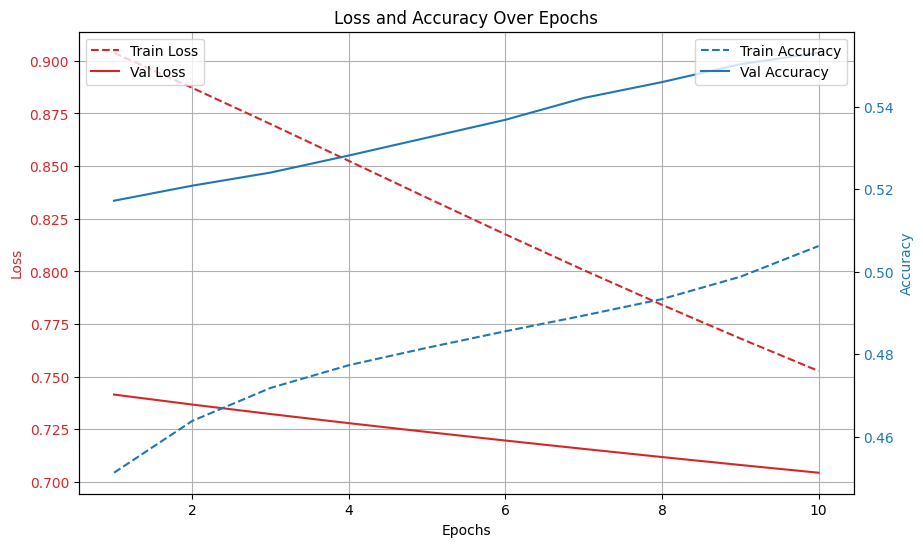

In [ ]:
#plot loss and accuracies
network1.plot_loss_and_accuracy(history1)

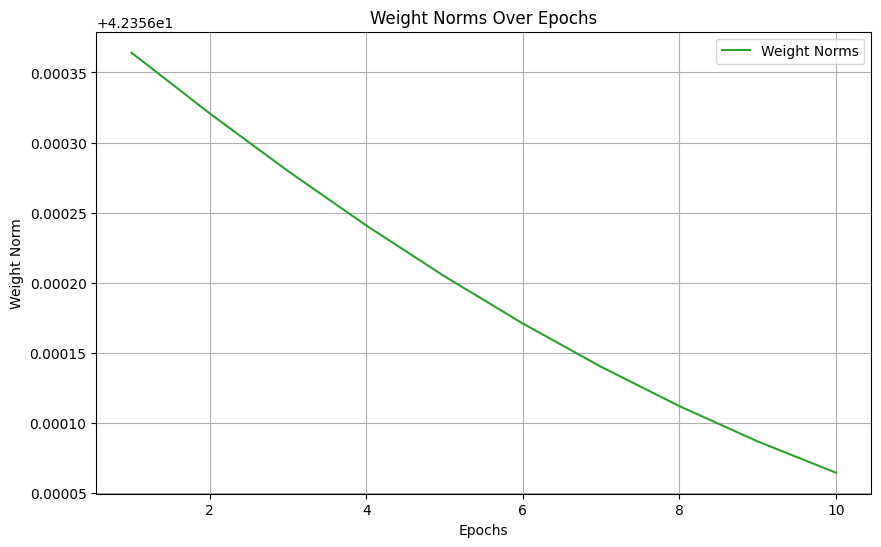

In [ ]:
#plot weight norm
network1.plot_weight_norms(history1)

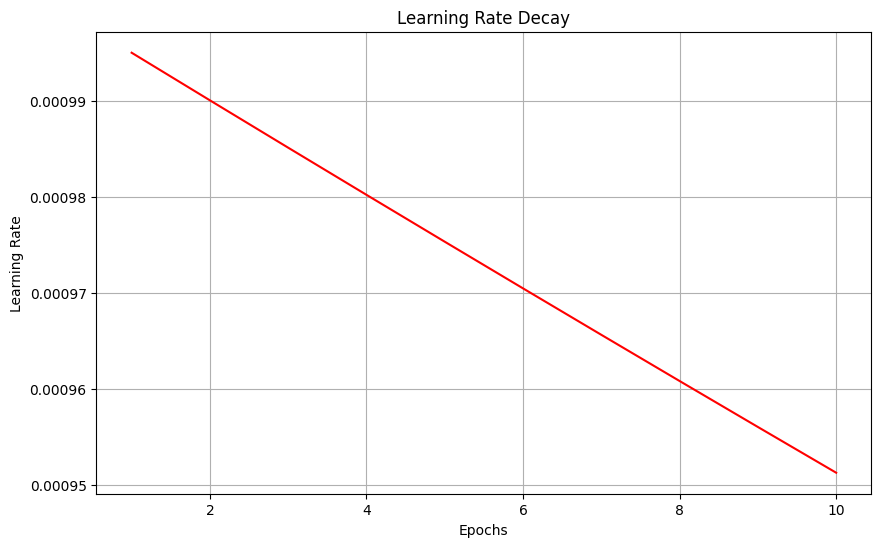

In [ ]:
#plot learning rate
network1.plot_learning_rate(history1)

#### Configuration Two - 2 Hidden Layers, L2 Regularization, No Dropout

In [ ]:
#set up configuration
layer_dims2 = [X_train.shape[0], 256, 128, y_train.shape[0]]
activations2 = ["relu", "relu",  "sigmoid"]
dropout_probs2 = [1.0, 1.0, 1.0]  #no dropout
regularizer2 = "L2"
reg_lambda = 0.001
seed = 36

#initialize network
network2 = NeuralNetwork(
    layer_dims2,
    activations2,
    dropout_probs2,
    regularizer2,
    reg_lambda=reg_lambda,
    seed=seed
)

#set epoch
epochs = 10


#set learning and decay rates
learning_rate = 0.001
decay_rate = 0.005

#train model
history2 = network2.train(
    X_train,
    y_train,
    X_val,
    y_val,
    epochs=epochs,
    learning_rate=learning_rate,
    decay_rate=decay_rate
)

Epoch 1/10, Train Loss: 1.4747, Val Loss: 1.2248, Train Acc: 0.5663,Val Acc: 0.5588
Epoch 2/10, Train Loss: 1.4127, Val Loss: 1.2165, Train Acc: 0.5664,Val Acc: 0.5582
Epoch 3/10, Train Loss: 1.3458, Val Loss: 1.2077, Train Acc: 0.5664,Val Acc: 0.5559
Epoch 4/10, Train Loss: 1.2741, Val Loss: 1.1983, Train Acc: 0.5666,Val Acc: 0.5538
Epoch 5/10, Train Loss: 1.1982, Val Loss: 1.1884, Train Acc: 0.5669,Val Acc: 0.5515
Epoch 6/10, Train Loss: 1.1199, Val Loss: 1.1783, Train Acc: 0.5682,Val Acc: 0.5481
Epoch 7/10, Train Loss: 1.0424, Val Loss: 1.1683, Train Acc: 0.5709,Val Acc: 0.5455
Epoch 8/10, Train Loss: 0.9709, Val Loss: 1.1590, Train Acc: 0.5774,Val Acc: 0.5422
Epoch 9/10, Train Loss: 0.9106, Val Loss: 1.1507, Train Acc: 0.5863,Val Acc: 0.5397
Epoch 10/10, Train Loss: 0.8647, Val Loss: 1.1436, Train Acc: 0.5931,Val Acc: 0.5370


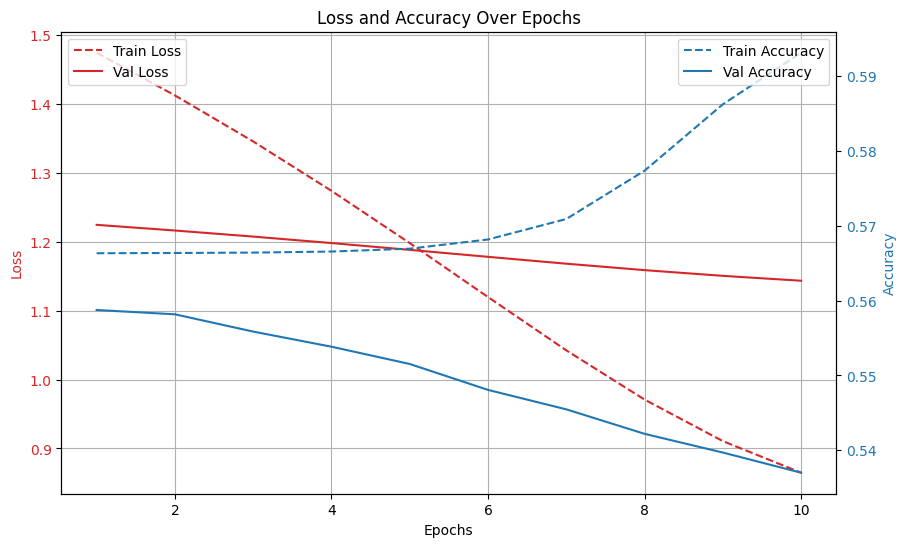

In [ ]:
#plot losses and accuracies
network2.plot_loss_and_accuracy(history2)

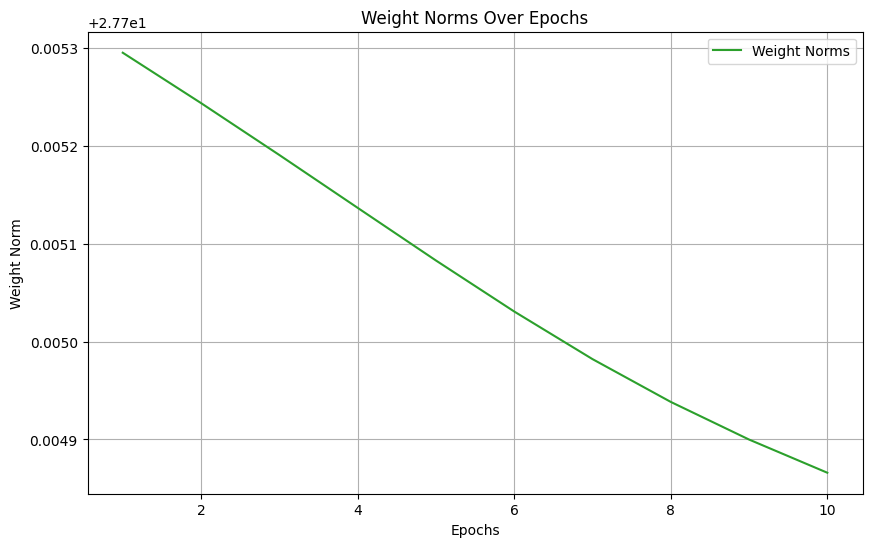

In [ ]:
#plot weight norms
network2.plot_weight_norms(history2)

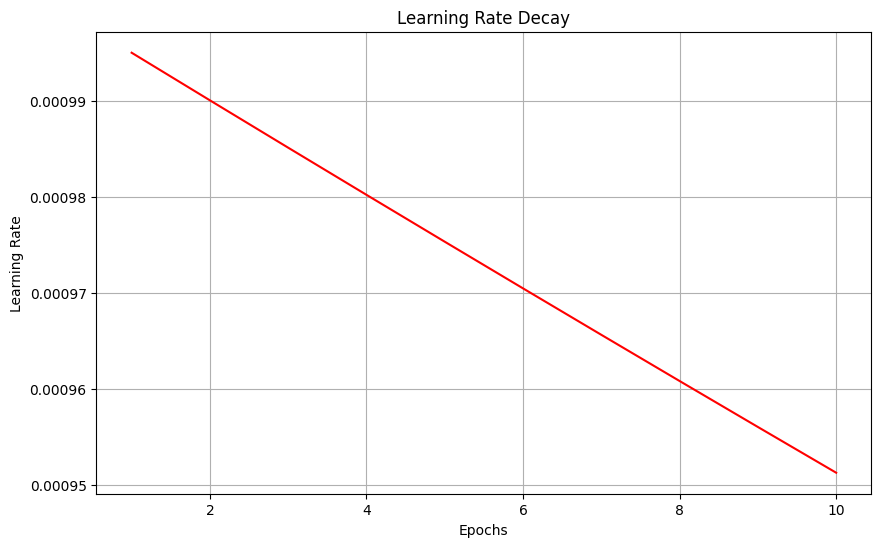

In [ ]:
#plot learning rate
network2.plot_learning_rate(history2)

#### Configuration Three - 3 Hidden Layers, L1 Regularization, Inverted Dropout

In [ ]:
#set up configuration
layer_dims3 = [X_train.shape[0], 512, 256, 128, y_train.shape[0]]
activations3 = ["relu", "relu", "relu", "softmax"]
dropout_probs3 = [0.5, 0.5, 0.5, 1.0]  #dropout applied to hidden layers
regularizer3 = "L1"
reg_lambda = 0.001
seed = 36

#initialize model
network3 = NeuralNetwork(layer_dims3, activations3, dropout_probs3, regularizer3, reg_lambda=reg_lambda, seed=seed)

#set learning and decay rates
learning_rate = 0.001
decay_rate = 0.004


#set epochs
epochs = 10

# Train networks
history3 = network3.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 2/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 3/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 4/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 5/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 6/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 7/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 8/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 9/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000
Epoch 10/10, Train Loss: 0.0001, Val Loss: 0.0011, Train Acc: 1.0000,Val Acc: 1.0000


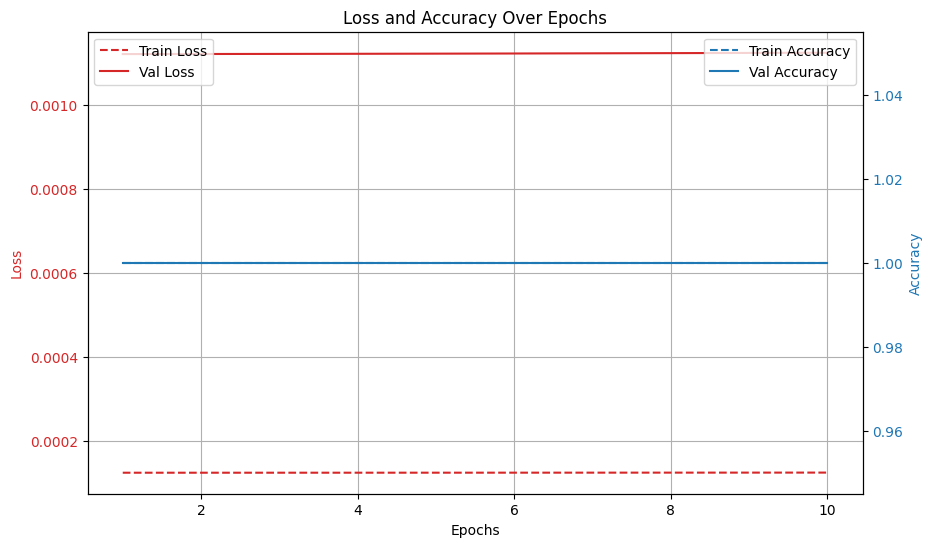

In [ ]:
#plot losses and accuracies
network3.plot_loss_and_accuracy(history3)

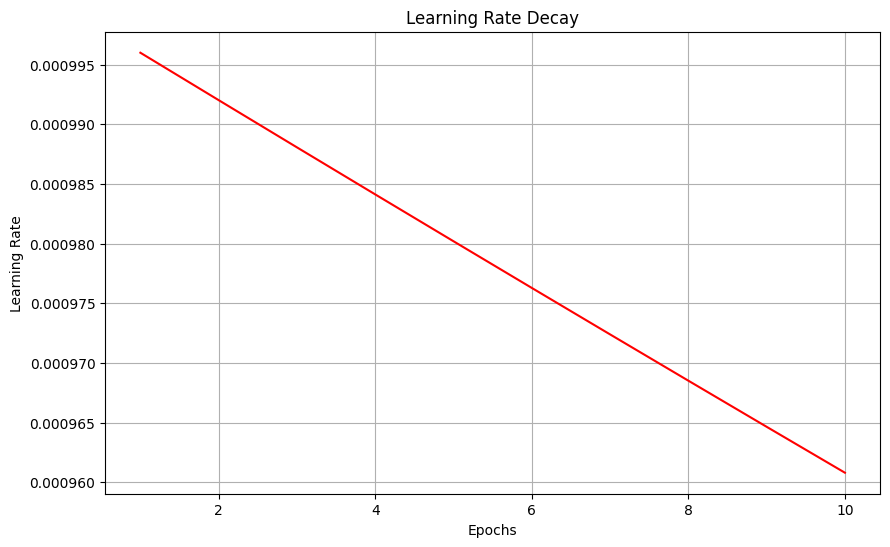

In [ ]:
#plot learning rate
network3.plot_learning_rate(history3)

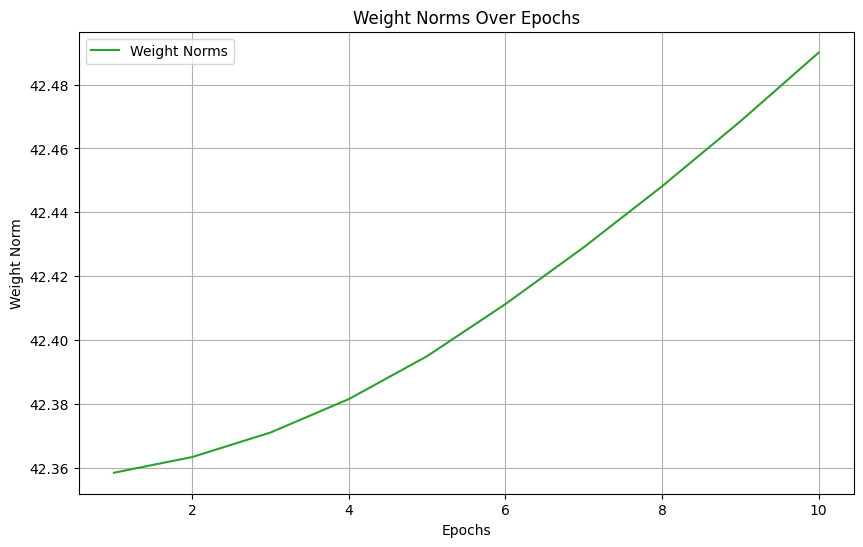

In [ ]:
#plot weight norms
network3.plot_weight_norms(history3)

## **Optimizers**

### SGD Optimizer

In [ ]:
def sgd_optimizer(X, y, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            xi = X[i:i+1]
            yi = y[i:i+1]

            grad_weights = None
            grad_bias = None

            #update weights and biases
            weights = weights - learning_rate * grad_weights
            bias = bias - learning_rate * grad_bias

    return weights, bias

### SGD Optimizer (Mini-batch Gradient Descent)

In [ ]:
def sgd_mini_batch(X, y, weights, bias, learning_rate, epochs, batch_size):
    for epoch in range(epochs):
        indices = np.random.permutation(X.shape[0])
        X = X[indices]
        y = y[indices]

        for i in range(0, X.shape[0], batch_size):
            xi = X[i:i+batch_size]
            yi = y[i:i+batch_size]

            grad_weights = None
            grad_bias = None

            #update weights and biases
            weights = weights - learning_rate * grad_weights
            bias = bias - learning_rate * grad_bias

    return weights, bias

## **Fully Connected Neural Network 2**

Network 2 is a fully connected neural network with implementation for optimizers

In [ ]:
class NeuralNetwork:
    def __init__(self, layer_dims, activations, dropout_probs=1.0, regularizer=None, reg_lambda=0.001, optimizer="sgd", seed=None):
        if seed is not None:
            np.random.seed(seed)
        assert len(layer_dims) == len(activations) + 1, "Number of activations must match the number of layers minus one."
        self.layer_dims = layer_dims
        self.activations = activations
        self.dropout_probs = dropout_probs if dropout_probs is not None else [1.0] * (len(layer_dims) - 1)
        assert len(self.dropout_probs) == len(self.layer_dims) - 1, "Number of dropout probabilities must match number of hidden layers"
        self.regularizer = regularizer
        self.reg_lambda = reg_lambda
        self.params = self._initialize_weights()

    def _initialize_weights(self):
        params = {}
        for l in range(1, len(self.layer_dims)):
            params[f"W{l}"] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * np.sqrt(2 / self.layer_dims[l - 1])
            params[f"b{l}"] = np.zeros((self.layer_dims[l], 1))
        return params

    def forward(self, X, is_training=True):
        activations = [X]
        caches = []
        A = X
        for i in range(1, len(self.layer_dims)):
            W, b = self.params[f"W{i}"], self.params[f"b{i}"]
            Z = np.dot(W, A) + b
            if self.activations[i - 1] == "sigmoid":
                activation_function = sigmoid_forward
                A = activation_function(Z)
            elif self.activations[i - 1] == "relu":
                activation_function = relu_forward
                A = activation_function(Z)
            elif self.activations[i - 1] == "softmax":
                activation_function = softmax_forward
                A = activation_function(Z)
            else:
                raise ValueError("Unsupported activation function.")

            if is_training and self.dropout_probs[i - 1] < 1.0:
                A, mask = inverted_dropout_forward(Z, self.dropout_probs[i - 1], activation_function)
                caches.append((Z, mask))
            else:
                caches.append(Z)

            activations.append(A)
            if self.activations[i - 1] == "softmax":
                assert np.allclose(np.sum(A, axis=0), 1, atol=1e-6), "Softmax outputs do not sum to 1."

        return A, activations, caches

    def backward(self, X, Y, activations, caches):
        grads = {}
        m = X.shape[1]
        L = len(self.layer_dims) - 1

        #output layer
        activation_output = self.activations[-1]
        if activation_output == "softmax":
            dZ = activations[-1] - Y
        elif activation_output == "sigmoid":
            dZ = (activations[-1] - Y) * activations[-1] * (1 - activations[-1])
        else:
            raise ValueError("Unsupported activation function for output layer.")

        dW = (1 / m) * np.dot(dZ, activations[-2].T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

        if self.regularizer == "L2":
            dW += (self.reg_lambda / m) * self.params[f"W{L}"]
        elif self.regularizer == "L1":
            dW += (self.reg_lambda / m) * np.sign(self.params[f"W{L}"])

        grads[f"dW{L}"] = dW
        grads[f"db{L}"] = db
        dA = np.dot(self.params[f"W{L}"].T, dZ)

        #remaining layers
        for l in reversed(range(1, L)):
            cache = caches[l - 1]
            if isinstance(cache, tuple):  #dropout applied
                Z, mask = cache
                dA = inverted_dropout_backward(dA, mask)

            Z = cache if not isinstance(cache, tuple) else cache[0]
            if self.activations[l - 1] == "relu":
                dZ = dA * relu_backward(Z)
            elif self.activations[l - 1] == "sigmoid":
                dZ = dA * sigmoid_backward(Z)
            elif self.activations[l - 1] == "softmax":
                dZ = dA * softmax_backward(Z)
            else:
                raise ValueError("Unsupported activation function.")

            dW = (1 / m) * np.dot(dZ, activations[l - 1].T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

            if self.regularizer == "L2":
                dW += (self.reg_lambda / m) * self.params[f"W{l}"]
            elif self.regularizer == "L1":
                dW += (self.reg_lambda / m) * np.sign(self.params[f"W{l}"])

            grads[f"dW{l}"] = dW
            grads[f"db{l}"] = db
            dA = np.dot(self.params[f"W{l}"].T, dZ)

        return grads

    def compute_loss(self, Y, Y_pred, output_activation="softmax"):
        m = Y.shape[1]
        assert Y_pred.shape == Y.shape, f"Y_pred shape mismatch: expected {Y.shape}, got {Y_pred.shape}"
        if output_activation == "softmax":
            cross_entropy_loss = -np.mean(np.sum(Y * np.log(Y_pred + 1e-8), axis=0))
        elif output_activation == "sigmoid":
            cross_entropy_loss = -np.mean(Y * np.log(Y_pred + 1e-8) + (1 - Y) * np.log(1 - Y_pred + 1e-8))
        else:
            raise ValueError("Unsupported output activation function. Use 'softmax' or 'sigmoid'.")
        reg_loss = 0
        if self.regularizer == "L2":
            for i in range(1, len(self.layer_dims)):
                reg_loss += np.sum(np.square(self.params[f"W{i}"]))
            reg_loss = (self.reg_lambda / (2 * m)) * reg_loss
        elif self.regularizer == "L1":
            for i in range(1, len(self.layer_dims)):
                reg_loss += np.sum(np.abs(self.params[f"W{i}"]))
            reg_loss = (self.reg_lambda / m) * reg_loss
        return cross_entropy_loss + reg_loss

    def update_weights(self, X, Y, learning_rate, grads=None, optimizer="none", epochs=1, batch_size=None):
        clip_threshold = 10  #threshold for gradient clipping
        m = X.shape[1]  #number of samples

        if optimizer == "sgd":
            for i in range(1, len(self.layer_dims)):
                self.params[f"W{i}"], self.params[f"b{i}"] = sgd_optimizer(
                    X, Y,
                    self.params[f"W{i}"], self.params[f"b{i}"],
                    learning_rate, epochs
                )

        elif optimizer == "sgd_mini_batch":
            for i in range(1, len(self.layer_dims)):
                self.params[f"W{i}"], self.params[f"b{i}"] = sgd_mini_batch(
                    X, Y,
                    self.params[f"W{i}"], self.params[f"b{i}"],
                    learning_rate, epochs, batch_size
                )

        else:  #batch Gradient Descent (default if optimizer="none")
            for epoch in range(epochs):
                #forward pass to compute predictions
                Y_pred, activations, caches = self.forward(X, is_training=True)

                #backward pass to compute gradients
                grads = self.backward(X, Y, activations, caches)

                #update weights and biases for all layers
                for i in range(1, len(self.layer_dims)):
                    dW = grads[f"dW{i}"]
                    db = grads[f"db{i}"]

                    #clip gradients
                    for grad_key in [f"dW{i}", f"db{i}"]:
                        grad = grads[grad_key]
                        grad_norm = np.linalg.norm(grad)
                        if grad_norm > clip_threshold:
                            grads[grad_key] *= (clip_threshold / grad_norm)

                    #regularization
                    if self.regularizer == "L2":
                        dW += (self.reg_lambda / m) * self.params[f"W{i}"]
                    elif self.regularizer == "L1":
                        dW += (self.reg_lambda / m) * np.sign(self.params[f"W{i}"])

                    #gradient update
                    self.params[f"W{i}"] -= learning_rate * dW
                    self.params[f"b{i}"] -= learning_rate * db

    def compute_accuracy(self, Y, Y_pred):
        """Compute accuracy by comparing true labels with predicted labels."""
        if self.activations[-1] == "softmax":
            predictions = np.argmax(Y_pred, axis=0)
            true_labels = np.argmax(Y, axis=0)
        elif self.activations[-1] == "sigmoid":
            predictions = (Y_pred > 0.5).astype(int)
            true_labels = Y.astype(int)
        else:
            raise ValueError("Unsupported output activation for accuracy calculation.")

        return np.mean(predictions == true_labels)


    def compute_weight_norm(self):
        """Compute the Frobenius norm of all weights."""
        total_norm = 0
        for i in range(1, len(self.layer_dims)):
            total_norm += np.linalg.norm(self.params[f"W{i}"]) ** 2
        return np.sqrt(total_norm)

    def train(self, X_train, Y_train, X_val, Y_val, epochs, learning_rate, batch_size=None, decay_rate=0.0, optimizer="none"):
        m = X_train.shape[1]
        history = {
            'train_loss': [],
            'val_loss': [],
            'learning_rate': [],
            'train_acc': [],
            'val_acc': [],
            'weight_norm': []
        }
        current_lr = learning_rate

        for epoch in range(epochs):
            epoch_loss = 0

            if optimizer == "none":  #batch gradient descent
                Y_pred, activations, caches = self.forward(X_train, is_training=True)
                train_loss = self.compute_loss(Y_train, Y_pred, output_activation=self.activations[-1])
                epoch_loss = train_loss  #full batch contributes to the epoch loss

                grads = self.backward(X_train, Y_train, activations, caches)
                self.update_weights(X_train, Y_train, learning_rate, grads=grads, optimizer="none", epochs=1)

            elif optimizer == "sgd":  #stochastic gradient descent
                for i in range(m):  #loop over individual samples
                    xi = X_train[:, i:i+1]
                    yi = Y_train[:, i:i+1]

                    Y_pred, activations, caches = self.forward(xi, is_training=True)
                    train_loss = self.compute_loss(yi, Y_pred, output_activation=self.activations[-1])
                    epoch_loss += train_loss

                    self.update_weights(xi, yi, learning_rate, optimizer="sgd", epochs=1)

                epoch_loss /= m  #average loss over samples

            elif optimizer == "sgd_mini_batch":  #mini-Batch Gradient Descent
                if batch_size is None:
                    raise ValueError(f"batch_size must be specified for mini-batch '{optimizer}' optimizer")

                perm = np.random.permutation(m)  #shuffle data
                X_train, Y_train = X_train[:, perm], Y_train[:, perm]
                num_minibatches = (m + batch_size - 1) // batch_size  #calculate the number of mini-batches

                for i in range(num_minibatches):
                    start = i * batch_size
                    end = min(start + batch_size, m)
                    X_batch = X_train[:, start:end]
                    Y_batch = Y_train[:, start:end]

                    Y_pred, activations, caches = self.forward(X_batch, is_training=True)
                    train_loss = self.compute_loss(Y_batch, Y_pred, output_activation=self.activations[-1])
                    epoch_loss += train_loss

                    self.update_weights(X_batch, Y_batch, learning_rate, optimizer="sgd_mini_batch", epochs=1, batch_size=batch_size)

                epoch_loss /= num_minibatches  #average loss over mini-batches

            #record epoch metrics
            history['train_loss'].append(epoch_loss)

            #validation metrics
            Y_val_pred, _, _ = self.forward(X_val, is_training=False)
            val_loss = self.compute_loss(Y_val, Y_val_pred, self.activations[-1])
            history['val_loss'].append(val_loss)

            train_acc = self.compute_accuracy(Y_train, self.forward(X_train, is_training=False)[0])
            val_acc = self.compute_accuracy(Y_val, Y_val_pred)
            weight_norm = self.compute_weight_norm()

            history['train_acc'].append(train_acc)
            history['val_acc'].append(val_acc)
            history['weight_norm'].append(weight_norm)

            #update learning rate with decay
            if decay_rate > 0.0:
                current_lr *= np.exp(-decay_rate)
            history['learning_rate'].append(current_lr)

            #print metrics for the epoch
            print(f"Epoch {epoch + 1}/{epochs}, "
                  f"Train Loss: {epoch_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Train Acc: {train_acc:.4f}, "
                  f"Val Acc: {val_acc:.4f}"
                  )

        return history


    def model_summary(self):
        total_params = 0
        print("Layer\tInput Dim\tOutput Dim\tParameters")
        print("=" * 40)

        for i in range(1, len(self.layer_dims)):
            input_dim = self.layer_dims[i - 1]
            output_dim = self.layer_dims[i]
            num_weights = input_dim * output_dim
            num_biases = output_dim
            layer_params = num_weights + num_biases
            total_params += layer_params

            print(f"{i}\t{input_dim}\t\t{output_dim}\t\t{layer_params}")

        print("=" * 40)
        print(f"Total Trainable Parameters: {total_params}")
        return total_params


    def predict(self, X):
        Y_pred, _, _ = self.forward(X, is_training=False)
        return Y_pred

    def plot_loss_and_accuracy(self, history):
        epochs = range(1, len(history['train_loss']) + 1)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        #plot loss on the left y-axis
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Loss", color='tab:red')
        ax1.plot(epochs, history['train_loss'], label="Train Loss", color='tab:red', linestyle='--')
        ax1.plot(epochs, history['val_loss'], label="Val Loss", color='tab:red')
        ax1.tick_params(axis='y', labelcolor='tab:red')
        ax1.legend(loc="upper left")
        ax1.grid(True)

        #create a twin axis for accuracy
        ax2 = ax1.twinx()
        ax2.set_ylabel("Accuracy", color='tab:blue')
        ax2.plot(epochs, history['train_acc'], label="Train Accuracy", color='tab:blue', linestyle='--')
        ax2.plot(epochs, history['val_acc'], label="Val Accuracy", color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax2.legend(loc="upper right")

        plt.title("Loss and Accuracy Over Epochs")
        plt.show()

    def plot_weight_norms(self, history):
        epochs = range(1, len(history['weight_norm']) + 1)
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, history['weight_norm'], label="Weight Norms", color='tab:green')
        plt.xlabel("Epochs")
        plt.ylabel("Weight Norm")
        plt.title("Weight Norms Over Epochs")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_learning_rate(self, history):
        #plot learning rate over epochs
        epochs = range(1, len(history['learning_rate']) + 1)
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, history['learning_rate'], color='red', label="Learning Rate")
        plt.xlabel("Epochs")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Decay")
        plt.grid(True)
        plt.show()

    def evaluate(self, X, Y, title="Confusion Matrix"):
        Y_pred = self.predict(X)
        if self.activations[-1] == "softmax":
            Y_pred_labels = np.argmax(Y_pred, axis=0)
            Y_true_labels = np.argmax(Y, axis=0)
            accuracy = np.mean(Y_pred_labels == Y_true_labels)
            cm = confusion_matrix(Y_true_labels, Y_pred_labels)

            #normalize confusion matrix to get percentages
            cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            plt.figure(figsize=(8, 6))
            sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues',
                        xticklabels=class_names,
                        yticklabels=class_names)
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.title(title)
            plt.show()

        elif self.activations[-1] == "sigmoid":
            Y_pred_labels = (Y_pred > 0.5).astype(int)
            Y_true_labels = Y.astype(int)
            accuracy = np.mean(Y_pred_labels == Y_true_labels)
            cm = confusion_matrix(Y_true_labels.flatten(), Y_pred_labels.flatten())

            #normalize confusion matrix to get percentages
            cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            plt.figure(figsize=(8, 6))
            sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues',
                        xticklabels=class_names,
                        yticklabels=class_names)
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.title(title)
            plt.show()

        else:
            raise ValueError("Unsupported output activation for evaluation. Use 'softmax' or 'sigmoid'.")

        return accuracy

## **Models Development**

### Model One -

1 Hidden Layer, 64 Neurons, Sigmoid Activation, No Dropout, No Regularizer

In [ ]:
#model one configuration
layer_dims = [X_train.shape[0], 64, y_train.shape[0]] #input -> 1 hidden -> output
activations = ["sigmoid", "sigmoid"]
dropout_probs = [1.0, 1.0]  #no dropout applied to hidden layers
regularizer = None
reg_lambda = 0.0
optimizer = None
seed = 36

#initialize model
model1 = NeuralNetwork(
    layer_dims,
    activations,
    dropout_probs,
    regularizer=regularizer,
    optimizer=optimizer,
    reg_lambda=reg_lambda,
    seed=seed)

#set epochs
epochs = 50


#set learning and decay rates
learning_rate = 0.0001
decay_rate = 0.00

#train model
historyM1 = model1.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/50, Train Loss: 0.7083, Val Loss: 0.7219, Train Acc: 0.4955, Val Acc: 0.5340
Epoch 2/50, Train Loss: 0.7083, Val Loss: 0.7220, Train Acc: 0.4954, Val Acc: 0.5339
Epoch 3/50, Train Loss: 0.7083, Val Loss: 0.7221, Train Acc: 0.4954, Val Acc: 0.5339
Epoch 4/50, Train Loss: 0.7083, Val Loss: 0.7221, Train Acc: 0.4953, Val Acc: 0.5339
Epoch 5/50, Train Loss: 0.7083, Val Loss: 0.7222, Train Acc: 0.4952, Val Acc: 0.5339
Epoch 6/50, Train Loss: 0.7083, Val Loss: 0.7223, Train Acc: 0.4951, Val Acc: 0.5338
Epoch 7/50, Train Loss: 0.7083, Val Loss: 0.7223, Train Acc: 0.4949, Val Acc: 0.5338
Epoch 8/50, Train Loss: 0.7083, Val Loss: 0.7224, Train Acc: 0.4948, Val Acc: 0.5336
Epoch 9/50, Train Loss: 0.7083, Val Loss: 0.7225, Train Acc: 0.4947, Val Acc: 0.5336
Epoch 10/50, Train Loss: 0.7083, Val Loss: 0.7225, Train Acc: 0.4945, Val Acc: 0.5337
Epoch 11/50, Train Loss: 0.7083, Val Loss: 0.7226, Train Acc: 0.4944, Val Acc: 0.5336
Epoch 12/50, Train Loss: 0.7083, Val Loss: 0.7227, Train Acc: 0

In [ ]:
#get model summary
model1.model_summary()

Layer	Input Dim	Output Dim	Parameters
1	23		64		1536
2	64		1		65
Total Trainable Parameters: 1601


1601

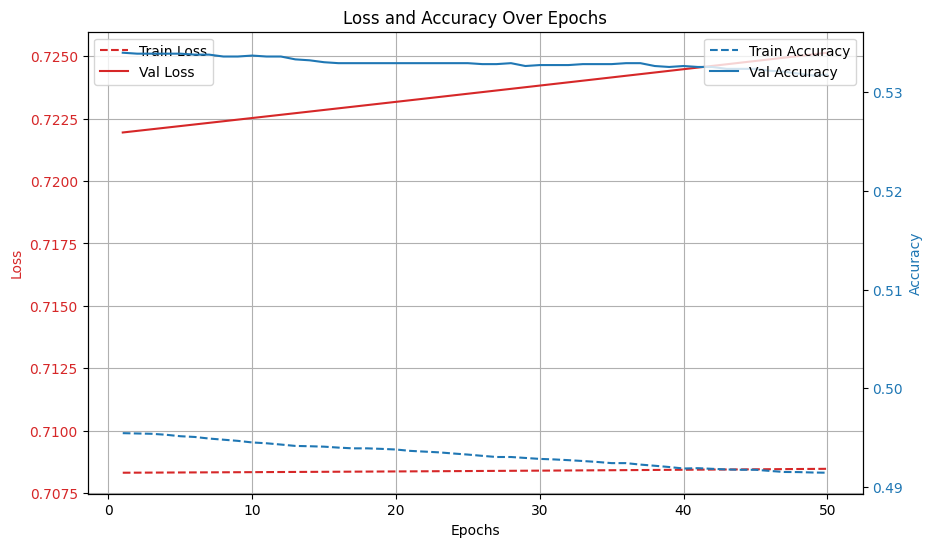

In [ ]:
#plot loss and accuracy
model1.plot_loss_and_accuracy(historyM1)

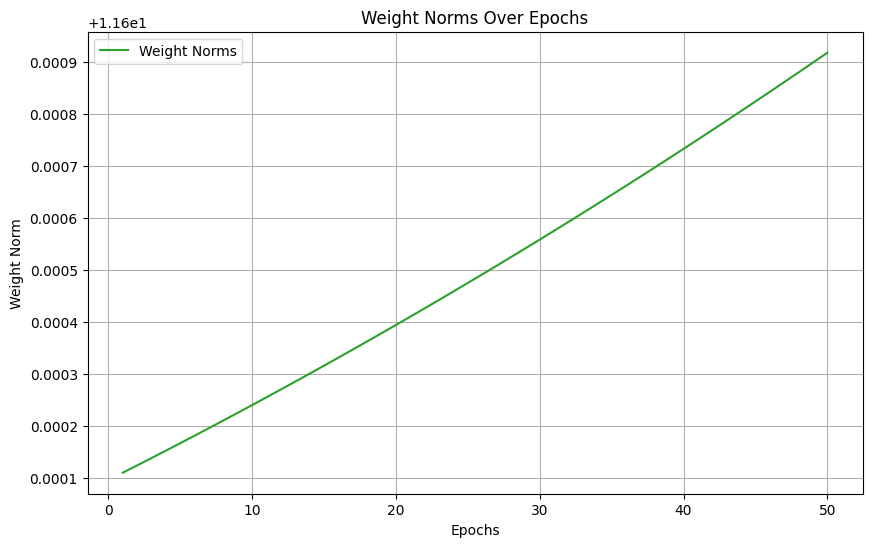

In [ ]:
#plot weight norms
model1.plot_weight_norms(historyM1)

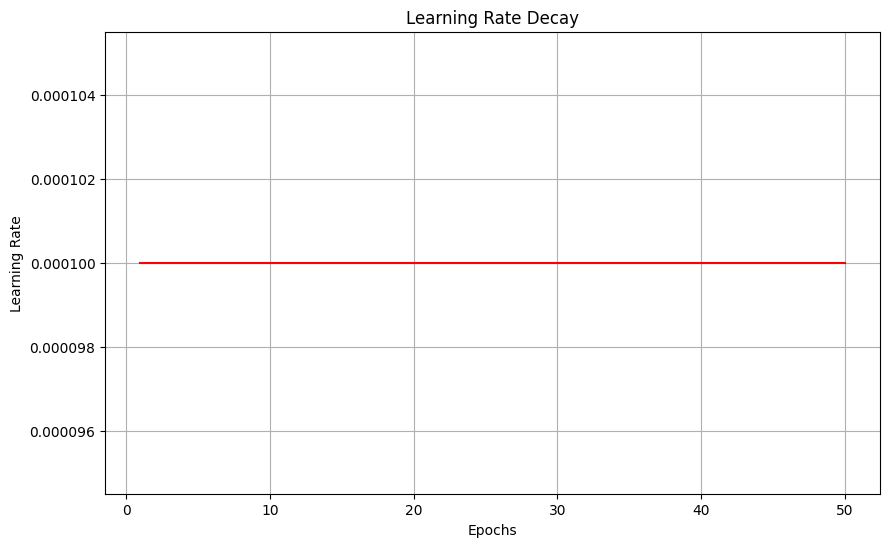

In [ ]:
#plot learning rate
model1.plot_learning_rate(historyM1)

In [ ]:
#get predictions on X_val
y_pred_val1 = model1.predict(X_val)
y_pred_val1 = (y_pred_val1 > 0.5).astype(int)
y_pred_val1

array([[0, 0, 0, ..., 0, 0, 0]])

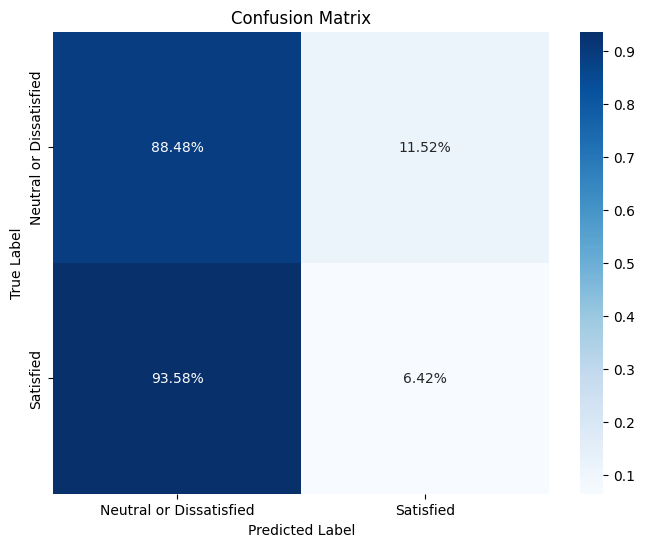


Model 1 - Val Acc: 53.18%


In [ ]:
#get accuracy
accuracy_val1 = model1.evaluate(X_val, y_val)
print(f"\nModel 1 - Val Acc: {accuracy_val1 * 100:.2f}%")

### Model Two -

1 Hidden Layer, 256 Neurons, ReLu-Sigmoid Activation, SGD Optimizer, No Dropout, No Regularizers

In [ ]:
#model two configuration
layer_dims = [X_train.shape[0], 256, y_train.shape[0]]  #input -> 1 hidden -> output
activations = ["relu", "sigmoid"]
dropout_probs = [1.0, 1.0]  #no dropout applied to hidden layers
regularizer = None
reg_lambda = 0.00
optimizer = None
seed = 36

#initialize model
model2 = NeuralNetwork(
    layer_dims,
    activations,
    dropout_probs,
    regularizer=regularizer,
    reg_lambda=reg_lambda,
    optimizer=optimizer,
    seed = seed)

#set epochs and batch size
epochs = 50

#set learning and decay rates
learning_rate = 0.0001
decay_rate = 0.00

#train networks
historyM2 = model2.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/50, Train Loss: 1.0222, Val Loss: 0.7292, Train Acc: 0.5709, Val Acc: 0.5966
Epoch 2/50, Train Loss: 1.0216, Val Loss: 0.7292, Train Acc: 0.5709, Val Acc: 0.5966
Epoch 3/50, Train Loss: 1.0209, Val Loss: 0.7291, Train Acc: 0.5710, Val Acc: 0.5965
Epoch 4/50, Train Loss: 1.0203, Val Loss: 0.7291, Train Acc: 0.5710, Val Acc: 0.5964
Epoch 5/50, Train Loss: 1.0197, Val Loss: 0.7291, Train Acc: 0.5710, Val Acc: 0.5963
Epoch 6/50, Train Loss: 1.0191, Val Loss: 0.7290, Train Acc: 0.5710, Val Acc: 0.5963
Epoch 7/50, Train Loss: 1.0185, Val Loss: 0.7290, Train Acc: 0.5711, Val Acc: 0.5966
Epoch 8/50, Train Loss: 1.0178, Val Loss: 0.7290, Train Acc: 0.5711, Val Acc: 0.5966
Epoch 9/50, Train Loss: 1.0172, Val Loss: 0.7289, Train Acc: 0.5711, Val Acc: 0.5965
Epoch 10/50, Train Loss: 1.0166, Val Loss: 0.7289, Train Acc: 0.5711, Val Acc: 0.5965
Epoch 11/50, Train Loss: 1.0160, Val Loss: 0.7289, Train Acc: 0.5712, Val Acc: 0.5964
Epoch 12/50, Train Loss: 1.0154, Val Loss: 0.7289, Train Acc: 0

In [ ]:
#get model summary
model2.model_summary()

Layer	Input Dim	Output Dim	Parameters
1	23		256		6144
2	256		1		257
Total Trainable Parameters: 6401


6401

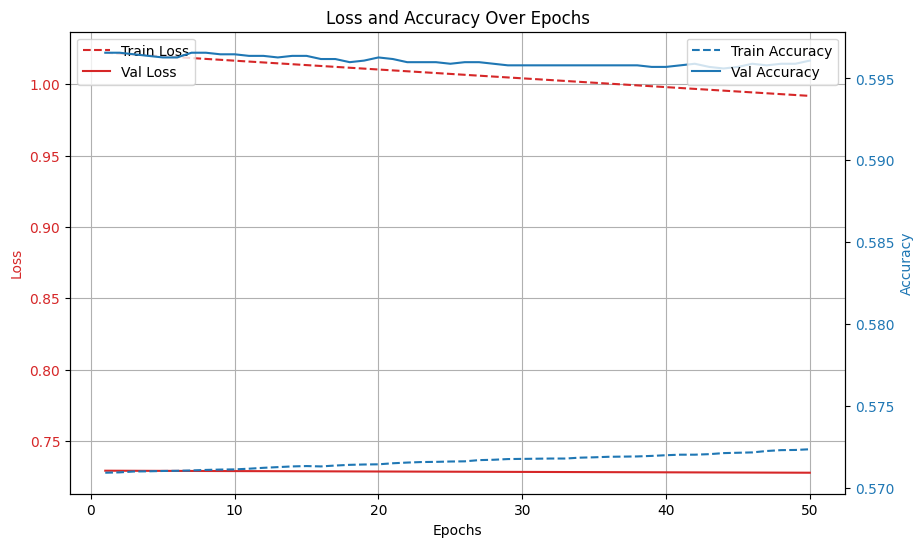

In [ ]:
#plot loss and accuracy
model2.plot_loss_and_accuracy(historyM2)

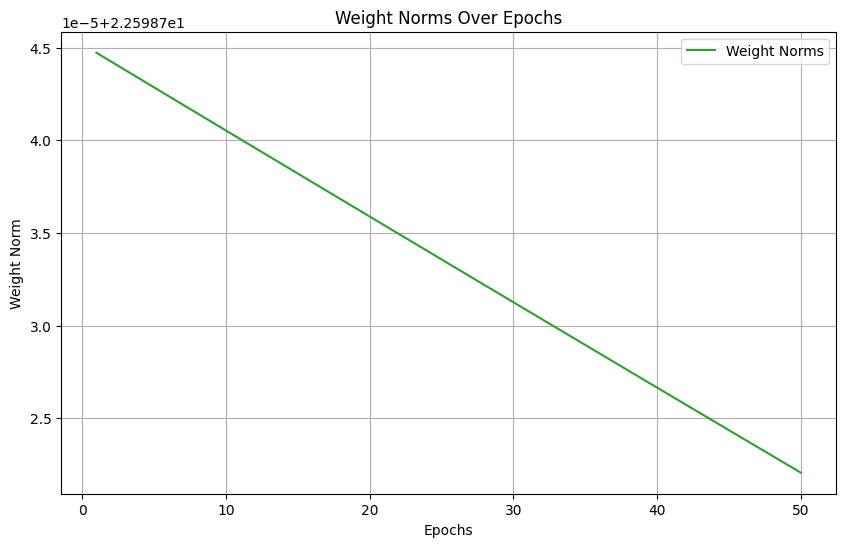

In [ ]:
#plot weight norms
model2.plot_weight_norms(historyM2)

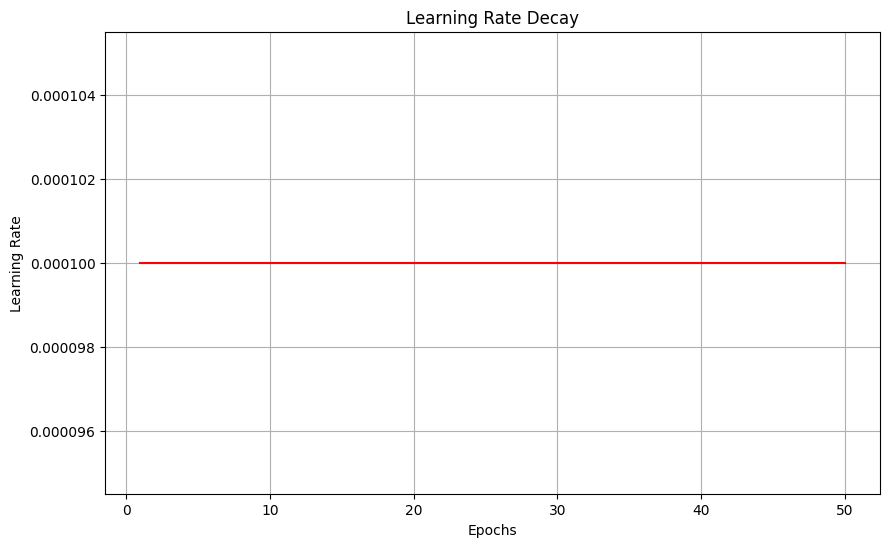

In [ ]:
#plot learning rate
model2.plot_learning_rate(historyM2)

In [ ]:
#get predictions on X_val
y_pred_val2 = model2.predict(X_val)
y_pred_val2 = (y_pred_val2 > 0.5).astype(int)
y_pred_val2

array([[1, 1, 1, ..., 1, 1, 1]])

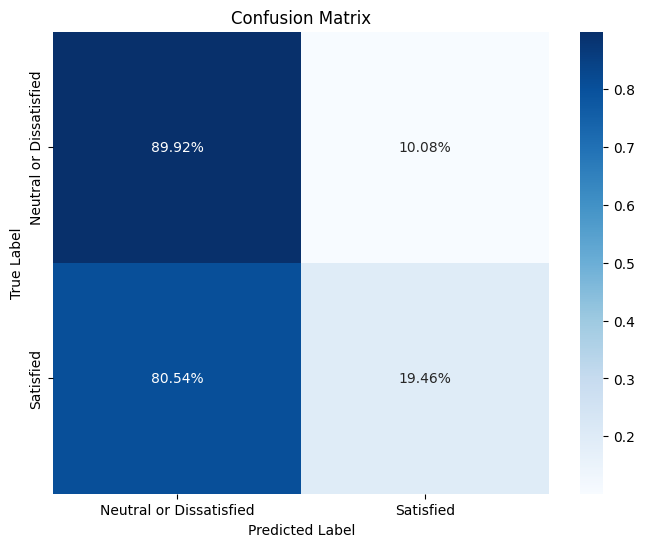


Model 2 - Val Acc: 59.61%


In [ ]:
#get accuracy
accuracy_val2 = model2.evaluate(X_val, y_val)
print(f"\nModel 2 - Val Acc: {accuracy_val2 * 100:.2f}%")

### Model Three -

Two Hidden Layers, 384 Neurons, ReLu x2-Sigmoid Activation, SGD With Mini Batches, No Dropout, No Regularizer

In [ ]:
#model three configuration
layer_dims = [X_train.shape[0], 256, 128, y_train.shape[0]]
activations = ["relu", "relu", "sigmoid"]
dropout_probs = [1.0, 1.0, 1.0]  #no dropout applied to hidden layers
regularizer = None
reg_lambda = 0.0
optimizer = "sgd_mini_batch"
seed = 36

#initialize model
model3 = NeuralNetwork(
    layer_dims,
    activations,
    dropout_probs,
    regularizer=regularizer,
    optimizer=optimizer,
    reg_lambda=reg_lambda,
    seed=seed)

#set epochs and batch size
epochs = 50
batch_size = 32

#set learning and decay rates
learning_rate = 0.0001
decay_rate = 0.002

#train model
historyM3 = model3.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/50, Train Loss: 1.4747, Val Loss: 1.2323, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 2/50, Train Loss: 1.4741, Val Loss: 1.2322, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 3/50, Train Loss: 1.4735, Val Loss: 1.2321, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 4/50, Train Loss: 1.4729, Val Loss: 1.2321, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 5/50, Train Loss: 1.4723, Val Loss: 1.2320, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 6/50, Train Loss: 1.4717, Val Loss: 1.2319, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 7/50, Train Loss: 1.4711, Val Loss: 1.2319, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 8/50, Train Loss: 1.4705, Val Loss: 1.2318, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 9/50, Train Loss: 1.4699, Val Loss: 1.2317, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 10/50, Train Loss: 1.4693, Val Loss: 1.2316, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 11/50, Train Loss: 1.4687, Val Loss: 1.2316, Train Acc: 0.5663, Val Acc: 0.5596
Epoch 12/50, Train Loss: 1.4681, Val Loss: 1.2315, Train Acc: 0

In [ ]:
#get model summary
model3.model_summary()

Layer	Input Dim	Output Dim	Parameters
1	23		256		6144
2	256		128		32896
3	128		1		129
Total Trainable Parameters: 39169


39169

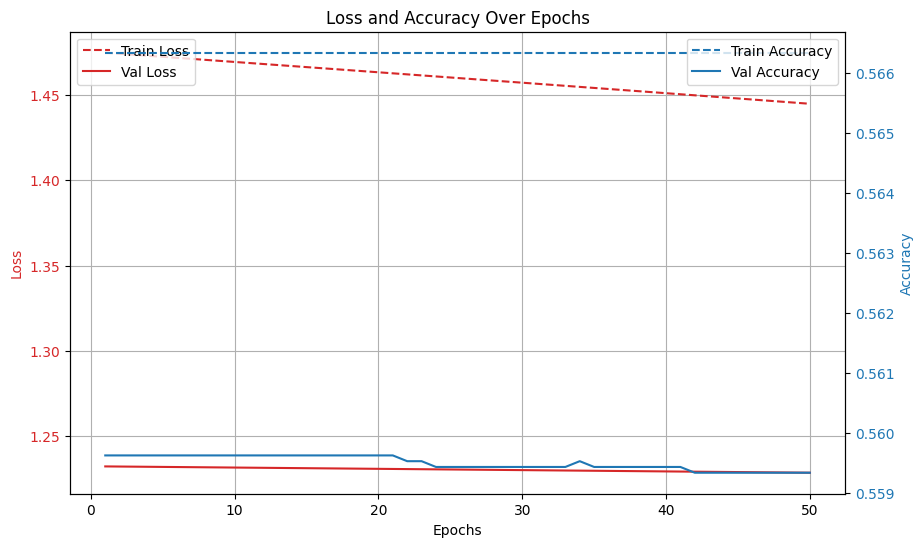

In [ ]:
#plot losses and accuraciies
model3.plot_loss_and_accuracy(historyM3)

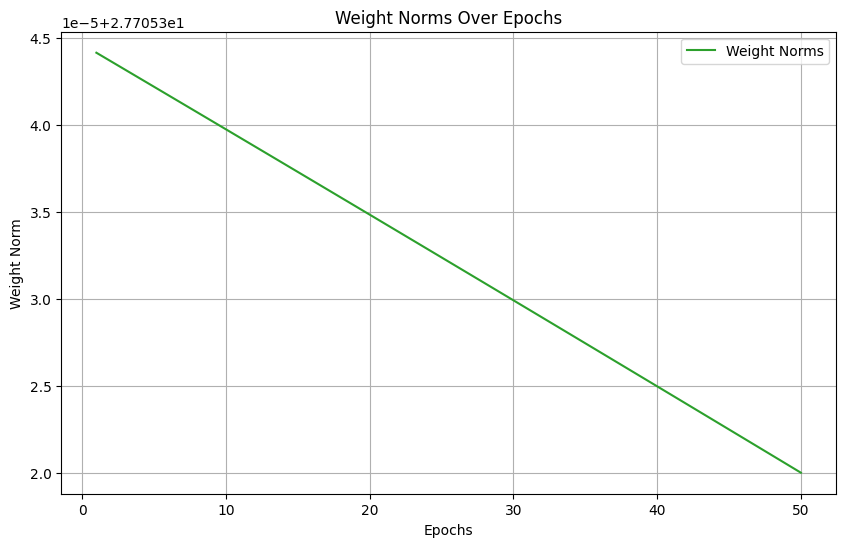

In [ ]:
#plot weight norms
model3.plot_weight_norms(historyM3)

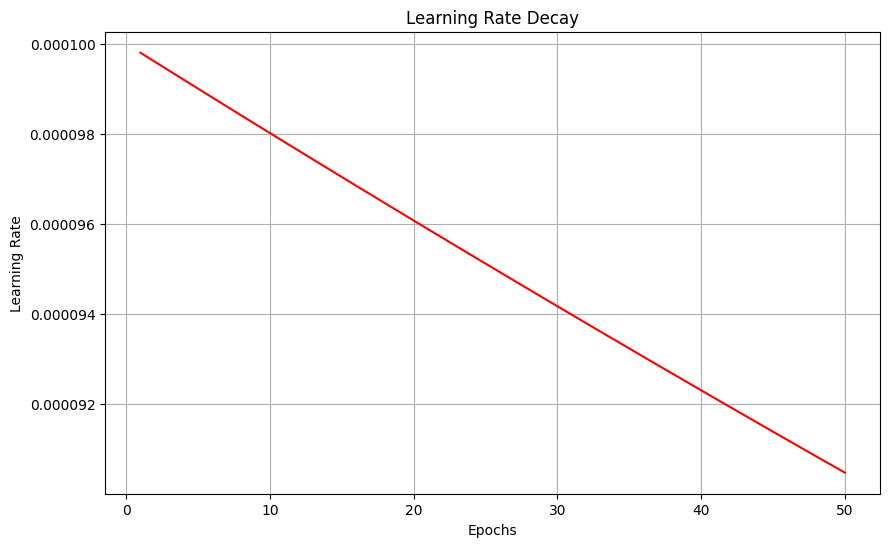

In [ ]:
#plot learning rate
model3.plot_learning_rate(historyM3)

In [ ]:
#get predictions
y_pred_val3 = model3.predict(X_val)
y_pred_val3 = (y_pred_val3 > 0.5).astype(int)
y_pred_val3

array([[0, 0, 0, ..., 0, 0, 0]])

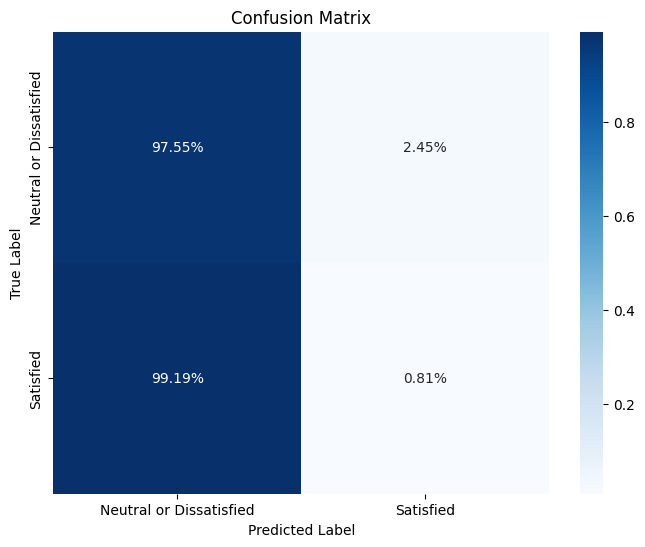


Model 3 - Val Acc: 55.93%


In [ ]:
#get  acuracy
accuracy_val3 = model3.evaluate(X_val, y_val)
print(f"\nModel 3 - Val Acc: {accuracy_val3 * 100:.2f}%")

### Model Four -

2 Hidden Layers, 768 Neurons, ReLu x3-Sigmoid Activation, SGD  Optimizer, Inverted Dropout Applied, No Regularizer

In [ ]:
#model four configuration
layer_dims = [X_train.shape[0], 512, 256, y_train.shape[0]]
activations = ["relu", "relu", "sigmoid"]
dropout_probs = [0.6, 0.6, 1.0]  #dropout applied to hidden layers
regularizer = None
reg_lambda = 0.0
optimizer = "sgd"
seed = 36

#initialize model
model4 = NeuralNetwork(
    layer_dims,
    activations,
    dropout_probs,
    regularizer=regularizer,
    optimizer=optimizer,
    reg_lambda=reg_lambda,
    seed=seed)

#set epochs and batch size
epochs = 50
batch_size = None

#set learning and decay rates
learning_rate = 0.0001
decay_rate = 0.002

#train model
historyM4 = model4.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/50, Train Loss: 1.4411, Val Loss: 0.7073, Train Acc: 0.5817, Val Acc: 0.5651
Epoch 2/50, Train Loss: 1.4327, Val Loss: 0.7072, Train Acc: 0.5818, Val Acc: 0.5650
Epoch 3/50, Train Loss: 1.4497, Val Loss: 0.7072, Train Acc: 0.5820, Val Acc: 0.5649
Epoch 4/50, Train Loss: 1.4471, Val Loss: 0.7071, Train Acc: 0.5820, Val Acc: 0.5649
Epoch 5/50, Train Loss: 1.4401, Val Loss: 0.7071, Train Acc: 0.5820, Val Acc: 0.5652
Epoch 6/50, Train Loss: 1.4502, Val Loss: 0.7070, Train Acc: 0.5822, Val Acc: 0.5651
Epoch 7/50, Train Loss: 1.4424, Val Loss: 0.7069, Train Acc: 0.5823, Val Acc: 0.5651
Epoch 8/50, Train Loss: 1.4431, Val Loss: 0.7069, Train Acc: 0.5823, Val Acc: 0.5653
Epoch 9/50, Train Loss: 1.4405, Val Loss: 0.7068, Train Acc: 0.5825, Val Acc: 0.5653
Epoch 10/50, Train Loss: 1.4420, Val Loss: 0.7068, Train Acc: 0.5827, Val Acc: 0.5653
Epoch 11/50, Train Loss: 1.4355, Val Loss: 0.7067, Train Acc: 0.5828, Val Acc: 0.5655
Epoch 12/50, Train Loss: 1.4402, Val Loss: 0.7067, Train Acc: 0

In [ ]:
#get model summary
model4.model_summary()

Layer	Input Dim	Output Dim	Parameters
1	23		512		12288
2	512		256		131328
3	256		1		257
Total Trainable Parameters: 143873


143873

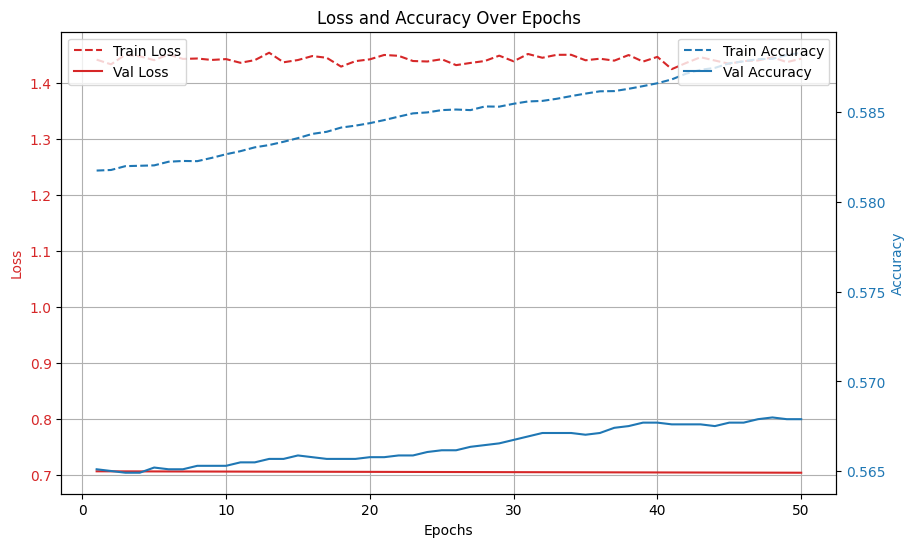

In [ ]:
#plot losses and accuracies
model4.plot_loss_and_accuracy(historyM4)

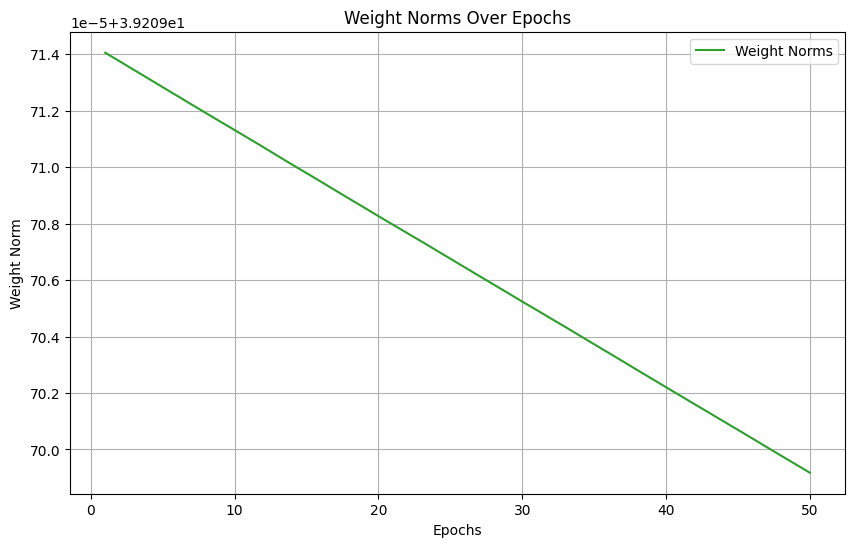

In [ ]:
#plot weight norms
model4.plot_weight_norms(historyM4)

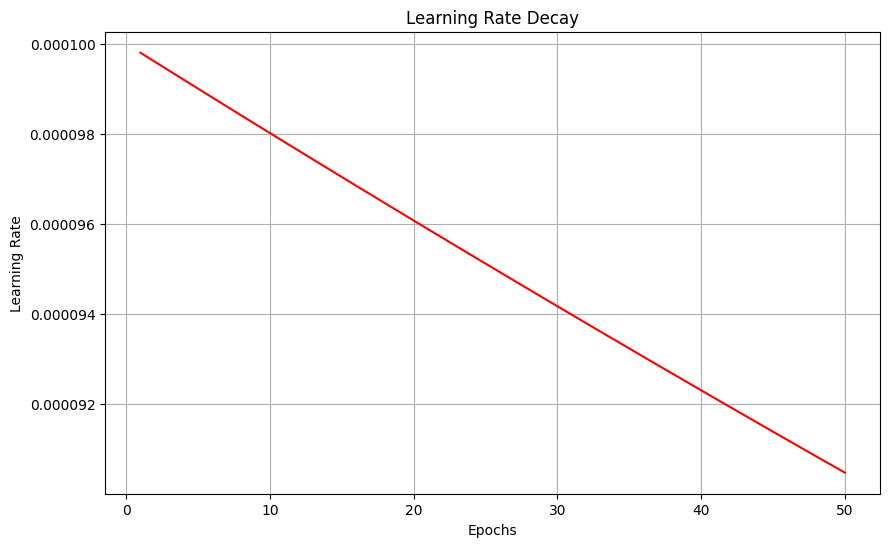

In [ ]:
#plot learning rate
model4.plot_learning_rate(historyM4)

In [ ]:
#get predictions on X_val
y_pred_val4 = model4.predict(X_val)
y_pred_val4 = (y_pred_val4 > 0.5).astype(int)
y_pred_val4

array([[0, 0, 0, ..., 1, 0, 1]])

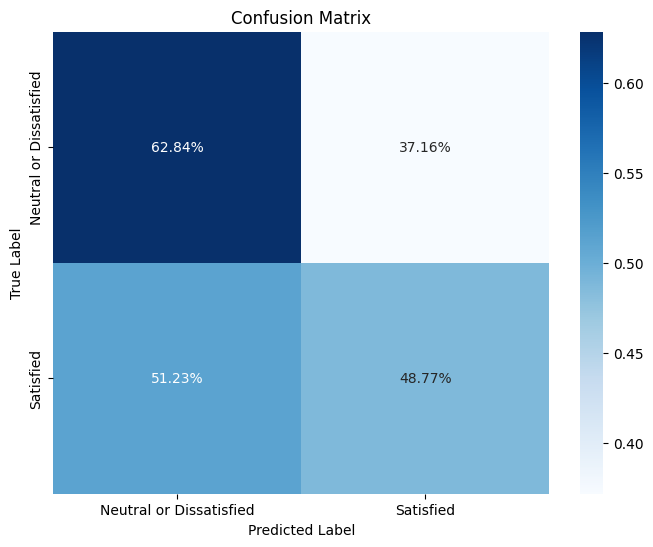


Model 4 - Val Acc: 56.79%


In [ ]:
#get accuracy
accuracy_val4 = model4.evaluate(X_val, y_val)
print(f"\nModel 4 - Val Acc: {accuracy_val4 * 100:.2f}%")

### Model Five -

Three Hidden Layers, 896 Neurons, ReLu x3-Sigmoid Activation, Batch Gradient Descent, Inverted Dropout, No Regularizer

In [ ]:
#model five configuration
layer_dims = [X_train.shape[0], 512, 256, 128, y_train.shape[0]]
activations = ["relu", "relu", "relu", "sigmoid"]
dropout_probs = [1.0, 0.8, 0.8, 1.0]  #dropout applied to 2 hidden layers
regularizer = None
reg_lambda = 0.0
optimizer = None
seed = 36

#initialize model
model5 = NeuralNetwork(
    layer_dims,
    activations,
    dropout_probs,
    regularizer=regularizer,
    optimizer=optimizer,
    reg_lambda=reg_lambda,
    seed=seed)

#set epochs and batch size
epochs = 50
batch_size = None

#set learning and decay rates
learning_rate = 0.0001
decay_rate = 0.002

#train model
historyM5 = model5.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/50, Train Loss: 1.1013, Val Loss: 0.7466, Train Acc: 0.4513, Val Acc: 0.5112
Epoch 2/50, Train Loss: 1.0962, Val Loss: 0.7465, Train Acc: 0.4515, Val Acc: 0.5113
Epoch 3/50, Train Loss: 1.0932, Val Loss: 0.7465, Train Acc: 0.4516, Val Acc: 0.5113
Epoch 4/50, Train Loss: 1.0983, Val Loss: 0.7465, Train Acc: 0.4518, Val Acc: 0.5114
Epoch 5/50, Train Loss: 1.0945, Val Loss: 0.7464, Train Acc: 0.4519, Val Acc: 0.5115
Epoch 6/50, Train Loss: 1.1039, Val Loss: 0.7464, Train Acc: 0.4520, Val Acc: 0.5118
Epoch 7/50, Train Loss: 1.0949, Val Loss: 0.7463, Train Acc: 0.4521, Val Acc: 0.5118
Epoch 8/50, Train Loss: 1.1019, Val Loss: 0.7463, Train Acc: 0.4522, Val Acc: 0.5117
Epoch 9/50, Train Loss: 1.0939, Val Loss: 0.7463, Train Acc: 0.4522, Val Acc: 0.5118
Epoch 10/50, Train Loss: 1.1014, Val Loss: 0.7462, Train Acc: 0.4523, Val Acc: 0.5118
Epoch 11/50, Train Loss: 1.0940, Val Loss: 0.7462, Train Acc: 0.4525, Val Acc: 0.5118
Epoch 12/50, Train Loss: 1.0997, Val Loss: 0.7461, Train Acc: 0

In [ ]:
#get model summary
model5.model_summary()

Layer	Input Dim	Output Dim	Parameters
1	23		512		12288
2	512		256		131328
3	256		128		32896
4	128		1		129
Total Trainable Parameters: 176641


176641

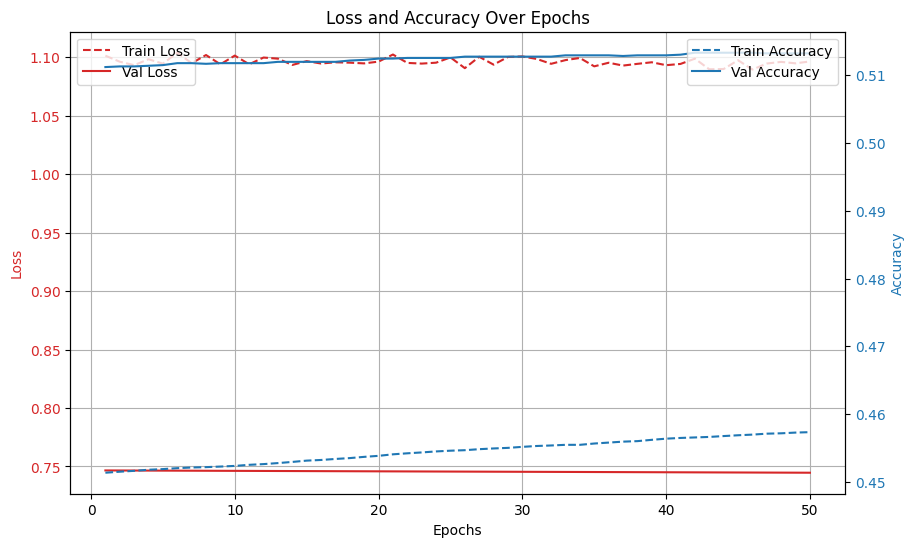

In [ ]:
#plot losses and accuracies
model5.plot_loss_and_accuracy(historyM5)

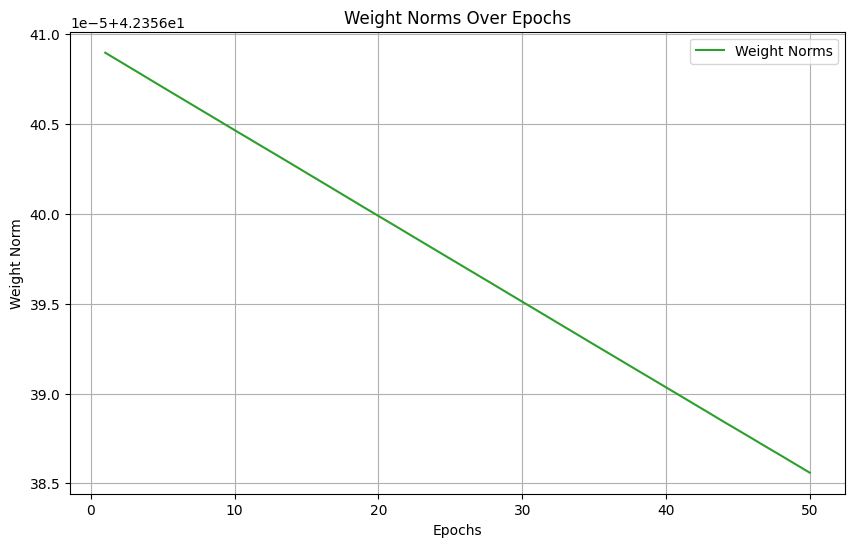

In [ ]:
#plot weight norms
model5.plot_weight_norms(historyM5)

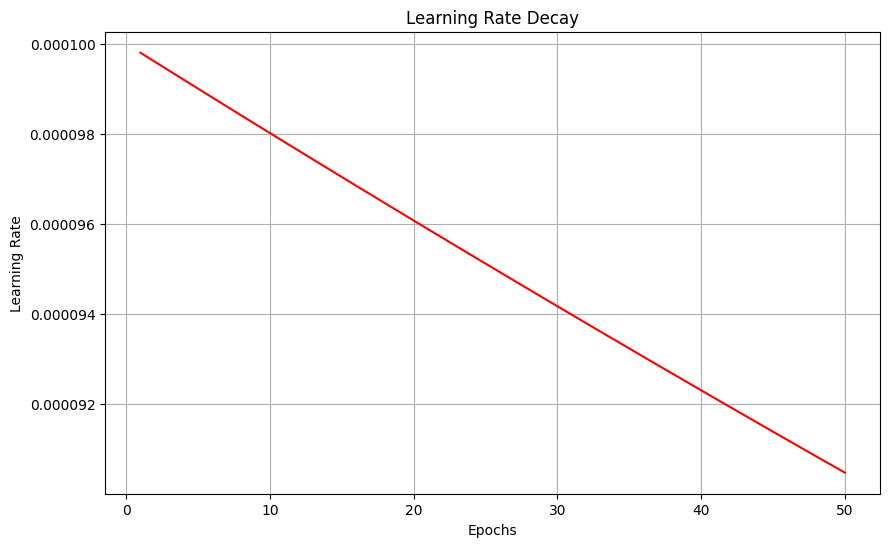

In [ ]:
#plot learning rate
model5.plot_learning_rate(historyM5)

In [ ]:
#get predictions
y_pred_val5 = model5.predict(X_val)
y_pred_val5 = (y_pred_val5 > 0.5).astype(int)
y_pred_val5

array([[0, 0, 0, ..., 0, 1, 0]])

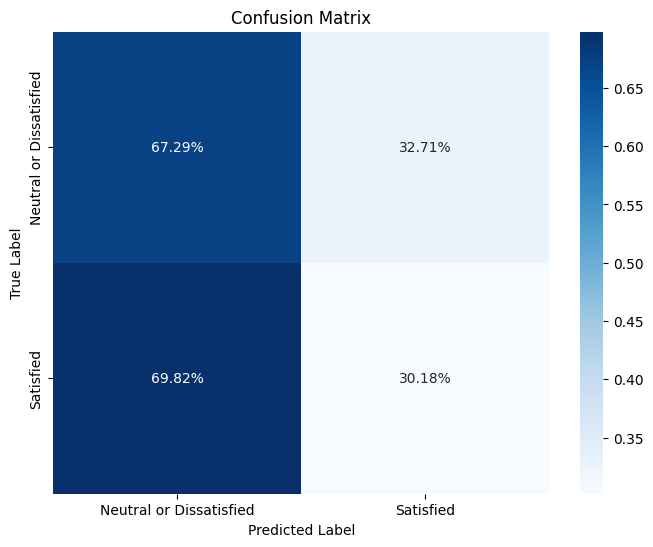


Model 5 - Val Acc: 51.32%


In [ ]:
#get accuracy
accuracy_val5 = model5.evaluate(X_val, y_val)
print(f"\nModel 5 - Val Acc: {accuracy_val5 * 100:.2f}%")

### Model Six -

Three Hidden Layers, 1792 Neurons, ReLu x4-Softmax Activation, SGD Optimizer, Inverted Dropout Applied, No Regularizer

In [ ]:
#model six configuration
layer_dims = [X_train.shape[0], 1024, 512, 256, y_train.shape[0]]
activations = ["relu", "relu", "relu", "softmax"]
dropout_probs = [0.8, 0.8, 0.8, 1.0]  #dropout applied to hidden layers
regularizer = None
reg_lambda = 0.0
optimizer = "sgd"
seed = 36

#initialize model
model6 = NeuralNetwork(
    layer_dims,
    activations,
    dropout_probs,
    regularizer=regularizer,
    optimizer=optimizer,
    reg_lambda=reg_lambda,
    seed=seed)

#set epochs and batch size
epochs = 50
batch_size = None

#set learning and decay rates
learning_rate = 0.00001
decay_rate = 0.005

#train model
historyM6 = model6.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 2/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 3/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 4/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 5/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 6/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 7/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 8/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 9/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 10/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 11/50, Train Loss: -0.0000, Val Loss: -0.0000, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 12/50, Train Loss: -0.0000, Val Los

KeyboardInterrupt: 

### Model Seven -

Three Hidden Layers, 896 Neurons, ReLu x3-Sigmoid Activation, SGD (Mini-batches) Optimizer, Inverted Dropout Applied, L2 Regularizer

In [ ]:
#model seven configuration
layer_dims = [X_train.shape[0], 512, 256, 128, y_train.shape[0]]
activations = ["relu", "relu", "relu", "sigmoid"]
dropout_probs = [1.0, 0.8, 0.8, 1.0]  #dropout applied to hidden layers
regularizer = "L2"
reg_lambda = 0.001
optimizer = "sgd_mini_batch"
seed = 36

#initialize model
model7 = NeuralNetwork(
    layer_dims,
    activations,
    dropout_probs,
    regularizer=regularizer,
    optimizer=optimizer,
    reg_lambda=reg_lambda,
    seed=seed)

#set epochs and batch size
epochs = 100
batch_size = 32

#set learning and decay rates
learning_rate = 0.01
decay_rate = 0.005

#train model
historyM7 = model7.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/100, Train Loss: 1.1013, Val Loss: 0.7427, Train Acc: 0.4640, Val Acc: 0.5161
Epoch 2/100, Train Loss: 1.0868, Val Loss: 0.7389, Train Acc: 0.4747, Val Acc: 0.5201
Epoch 3/100, Train Loss: 1.0744, Val Loss: 0.7352, Train Acc: 0.4826, Val Acc: 0.5239
Epoch 4/100, Train Loss: 1.0698, Val Loss: 0.7316, Train Acc: 0.4913, Val Acc: 0.5276
Epoch 5/100, Train Loss: 1.0567, Val Loss: 0.7282, Train Acc: 0.4971, Val Acc: 0.5306
Epoch 6/100, Train Loss: 1.0554, Val Loss: 0.7249, Train Acc: 0.5013, Val Acc: 0.5345
Epoch 7/100, Train Loss: 1.0368, Val Loss: 0.7217, Train Acc: 0.5059, Val Acc: 0.5366
Epoch 8/100, Train Loss: 1.0329, Val Loss: 0.7186, Train Acc: 0.5095, Val Acc: 0.5393
Epoch 9/100, Train Loss: 1.0150, Val Loss: 0.7155, Train Acc: 0.5126, Val Acc: 0.5435
Epoch 10/100, Train Loss: 1.0113, Val Loss: 0.7125, Train Acc: 0.5155, Val Acc: 0.5464
Epoch 11/100, Train Loss: 0.9944, Val Loss: 0.7095, Train Acc: 0.5186, Val Acc: 0.5502
Epoch 12/100, Train Loss: 0.9892, Val Loss: 0.7066, 

In [ ]:
#get model summary
model7.model_summary()

Layer	Input Dim	Output Dim	Parameters
1	23		512		12288
2	512		256		131328
3	256		128		32896
4	128		1		129
Total Trainable Parameters: 176641


176641

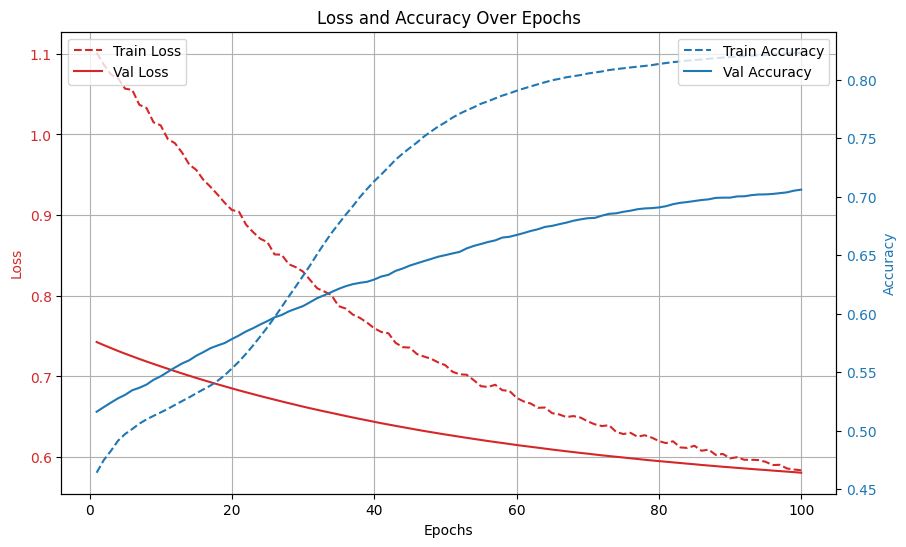

In [ ]:
#plot losses and accuracies
model7.plot_loss_and_accuracy(historyM7)

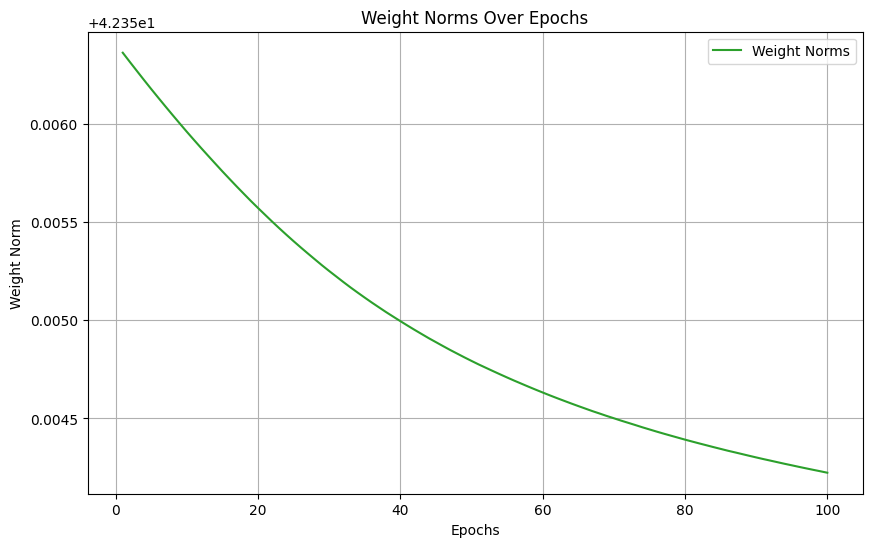

In [ ]:
#plot weight norms
model7.plot_weight_norms(historyM7)

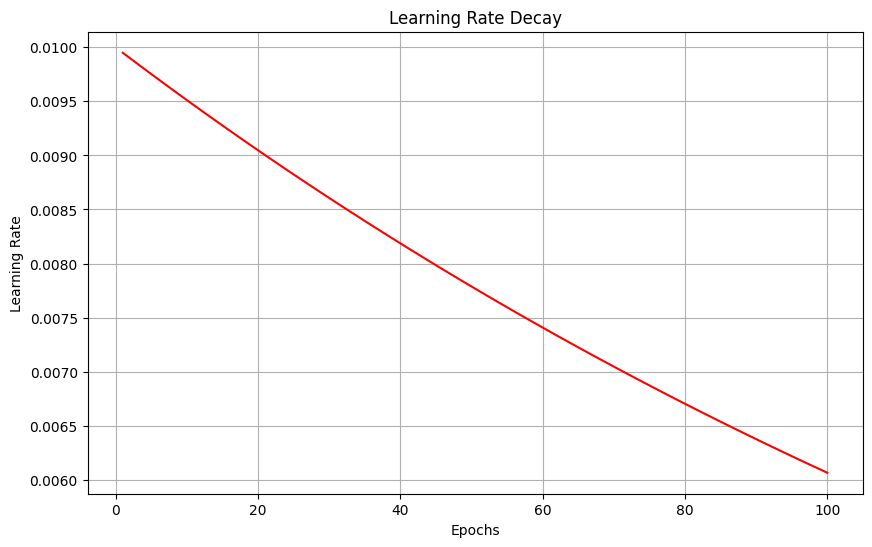

In [ ]:
#plot learning rate
model7.plot_learning_rate(historyM7)

In [ ]:
#get predictions
y_pred_val7 = model7.predict(X_val)
y_pred_val7 = (y_pred_val7 > 0.5).astype(int)
y_pred_val7

array([[0, 0, 0, ..., 0, 0, 0]])

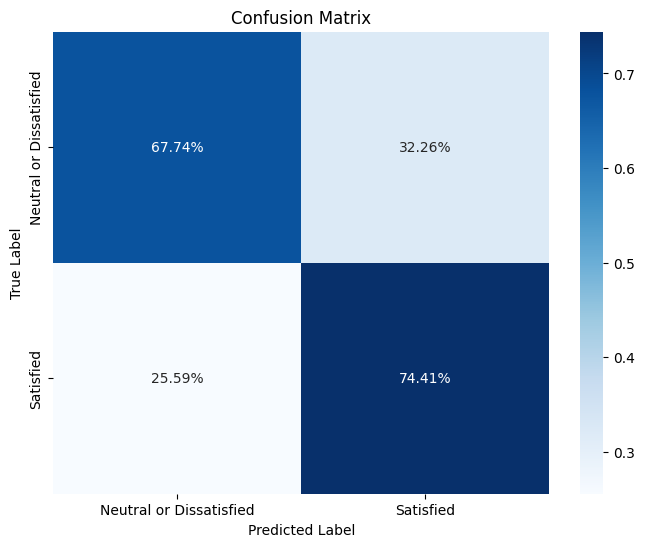


Model 7 - Val Acc: 70.61%


In [ ]:
#get accuracy
accuracy_val7 = model7.evaluate(X_val, y_val)
print(f"\nModel 7 - Val Acc: {accuracy_val7 * 100:.2f}%")

In [ ]:
#load model 7
with open("/model7.pkl", "rb") as f:
    model7 = pickle.load(f)

In [ ]:
print(model7.model_summary())

Layer	Input Dim	Output Dim	Parameters
1	23		512		12288
2	512		256		131328
3	256		128		32896
4	128		1		129
Total Trainable Parameters: 176641
176641


In [ ]:
#retrain model 7 for 200 more epochs
epochs = 200
batch_size = 32

#learning rate and decay rate
learning_rate = 0.01
decay_rate = 0.005

#train model
historyM7 = model7.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/200, Train Loss: 0.5773, Val Loss: 0.5800, Train Acc: 0.8237, Val Acc: 0.7067
Epoch 2/200, Train Loss: 0.5797, Val Loss: 0.5794, Train Acc: 0.8240, Val Acc: 0.7075
Epoch 3/200, Train Loss: 0.5790, Val Loss: 0.5788, Train Acc: 0.8242, Val Acc: 0.7084
Epoch 4/200, Train Loss: 0.5790, Val Loss: 0.5783, Train Acc: 0.8245, Val Acc: 0.7080
Epoch 5/200, Train Loss: 0.5781, Val Loss: 0.5778, Train Acc: 0.8247, Val Acc: 0.7085
Epoch 6/200, Train Loss: 0.5781, Val Loss: 0.5772, Train Acc: 0.8250, Val Acc: 0.7093
Epoch 7/200, Train Loss: 0.5739, Val Loss: 0.5766, Train Acc: 0.8252, Val Acc: 0.7095
Epoch 8/200, Train Loss: 0.5725, Val Loss: 0.5761, Train Acc: 0.8257, Val Acc: 0.7097
Epoch 9/200, Train Loss: 0.5714, Val Loss: 0.5755, Train Acc: 0.8259, Val Acc: 0.7107
Epoch 10/200, Train Loss: 0.5737, Val Loss: 0.5749, Train Acc: 0.8261, Val Acc: 0.7113
Epoch 11/200, Train Loss: 0.5719, Val Loss: 0.5745, Train Acc: 0.8263, Val Acc: 0.7118
Epoch 12/200, Train Loss: 0.5710, Val Loss: 0.5740, 

In [ ]:
#retrain model 7 a further 200 epochs
epochs = 200
batch_size = 32

#increase learning rate and decay rate
learning_rate = 0.1
decay_rate = 0.01

#train model
historyM7 = model7.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/200, Train Loss: 0.4726, Val Loss: 0.5292, Train Acc: 0.8481, Val Acc: 0.7494
Epoch 2/200, Train Loss: 0.4765, Val Loss: 0.5291, Train Acc: 0.8485, Val Acc: 0.7484
Epoch 3/200, Train Loss: 0.4711, Val Loss: 0.5276, Train Acc: 0.8491, Val Acc: 0.7500
Epoch 4/200, Train Loss: 0.4710, Val Loss: 0.5268, Train Acc: 0.8497, Val Acc: 0.7512
Epoch 5/200, Train Loss: 0.4692, Val Loss: 0.5259, Train Acc: 0.8503, Val Acc: 0.7516
Epoch 6/200, Train Loss: 0.4680, Val Loss: 0.5254, Train Acc: 0.8509, Val Acc: 0.7520
Epoch 7/200, Train Loss: 0.4629, Val Loss: 0.5248, Train Acc: 0.8514, Val Acc: 0.7525
Epoch 8/200, Train Loss: 0.4638, Val Loss: 0.5251, Train Acc: 0.8520, Val Acc: 0.7517
Epoch 9/200, Train Loss: 0.4589, Val Loss: 0.5229, Train Acc: 0.8525, Val Acc: 0.7545
Epoch 10/200, Train Loss: 0.4606, Val Loss: 0.5240, Train Acc: 0.8529, Val Acc: 0.7518
Epoch 11/200, Train Loss: 0.4585, Val Loss: 0.5214, Train Acc: 0.8536, Val Acc: 0.7548
Epoch 12/200, Train Loss: 0.4588, Val Loss: 0.5221, 

In [ ]:
#retrain model 7 a further 200 epochs
epochs = 200
batch_size = 32

#increase learning rate and decay rate
learning_rate = 0.1
decay_rate = 0.01

#train model
historyM7 = model7.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/200, Train Loss: 0.3624, Val Loss: 0.4859, Train Acc: 0.8824, Val Acc: 0.7685
Epoch 2/200, Train Loss: 0.3634, Val Loss: 0.4856, Train Acc: 0.8825, Val Acc: 0.7690
Epoch 3/200, Train Loss: 0.3611, Val Loss: 0.4858, Train Acc: 0.8825, Val Acc: 0.7686
Epoch 4/200, Train Loss: 0.3622, Val Loss: 0.4856, Train Acc: 0.8825, Val Acc: 0.7688
Epoch 5/200, Train Loss: 0.3596, Val Loss: 0.4850, Train Acc: 0.8827, Val Acc: 0.7695
Epoch 6/200, Train Loss: 0.3599, Val Loss: 0.4850, Train Acc: 0.8827, Val Acc: 0.7691
Epoch 7/200, Train Loss: 0.3594, Val Loss: 0.4847, Train Acc: 0.8829, Val Acc: 0.7694
Epoch 8/200, Train Loss: 0.3592, Val Loss: 0.4849, Train Acc: 0.8829, Val Acc: 0.7690
Epoch 9/200, Train Loss: 0.3591, Val Loss: 0.4845, Train Acc: 0.8830, Val Acc: 0.7692
Epoch 10/200, Train Loss: 0.3619, Val Loss: 0.4845, Train Acc: 0.8831, Val Acc: 0.7694
Epoch 11/200, Train Loss: 0.3596, Val Loss: 0.4848, Train Acc: 0.8831, Val Acc: 0.7689
Epoch 12/200, Train Loss: 0.3584, Val Loss: 0.4840, 

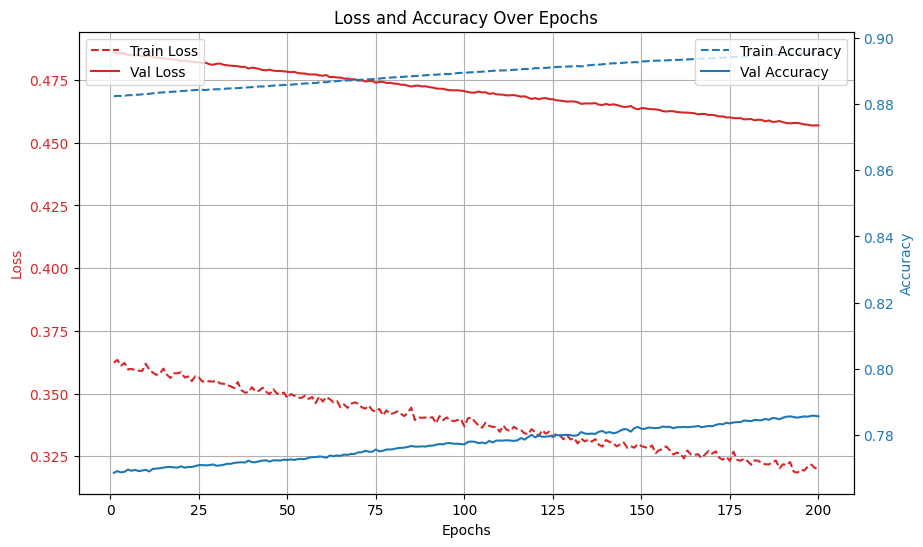

In [ ]:
#plot losses and accuracies
model7.plot_loss_and_accuracy(historyM7)

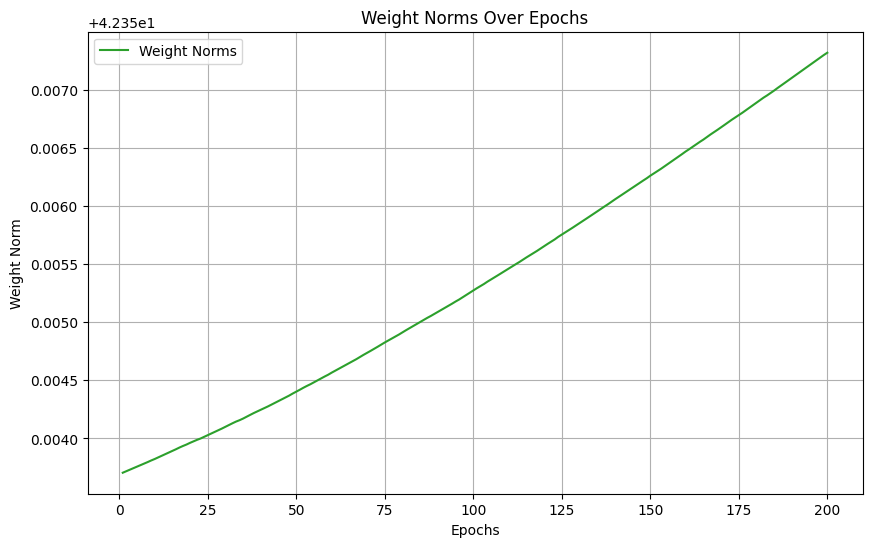

In [ ]:
#plot weight norms
model7.plot_weight_norms(historyM7)

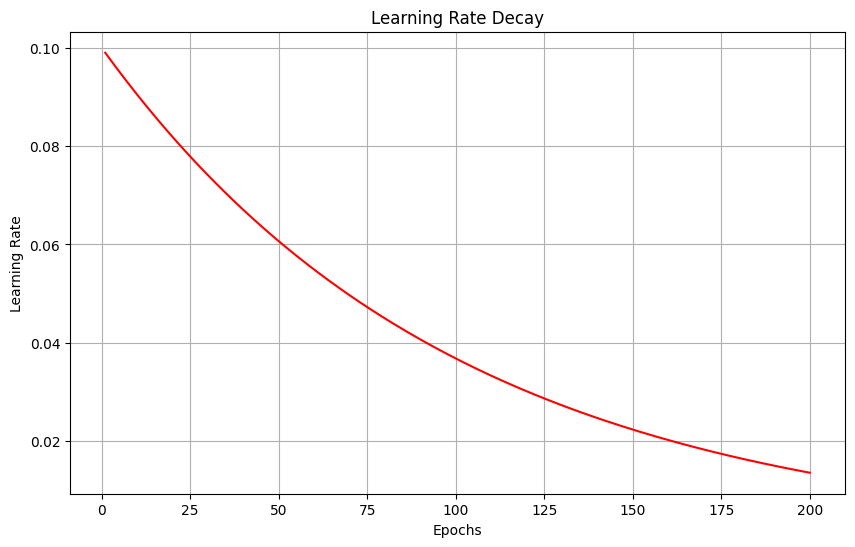

In [ ]:
#plot learning rate over epochs
model7.plot_learning_rate(historyM7)

In [ ]:
#get predictions
y_pred_val7 = model7.predict(X_val)
y_pred_val7 = (y_pred_val7 > 0.5).astype(int)
y_pred_val7

array([[1, 0, 1, ..., 0, 0, 0]])

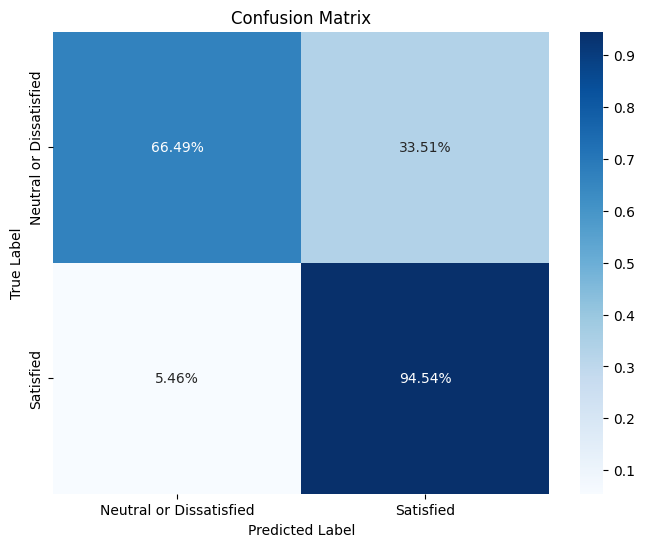


Model 7 - Val Acc: 78.56%


In [ ]:
#get accuracy
accuracy_val7 = model7.evaluate(X_val, y_val)
print(f"\nModel 7 - Val Acc: {accuracy_val7 * 100:.2f}%")

### Model Eight -

Three Hidden Layers, 896 Neurons, ReLu x3-Sigmoid Activation, SGD Optimizer, Inverted Dropout Applied, L1 Regularizer

In [ ]:
#model eight configuration
layer_dims = [X_train.shape[0], 512, 256, 128, y_train.shape[0]]
activations = ["relu", "relu", "relu", "sigmoid"]
dropout_probs = [1.0, 0.8, 0.8, 1.0]  #dropout applied to hidden layers
regularizer = "L1"
reg_lambda = 0.001
optimizer = "sgd"
seed = 36

#initialize model
model8 = NeuralNetwork(
    layer_dims,
    activations,
    dropout_probs,
    regularizer=regularizer,
    optimizer=optimizer,
    reg_lambda=reg_lambda,
    seed=seed)

#set epochs and batch size
epochs = 200
batch_size = 32

#set learning and decay rates
learning_rate = 0.01
decay_rate = 0.005

#train model
historyM8 = model8.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=learning_rate,
                         decay_rate=decay_rate)

Epoch 1/200, Train Loss: 1.1014, Val Loss: 0.7437, Train Acc: 0.4640, Val Acc: 0.5161
Epoch 2/200, Train Loss: 1.0869, Val Loss: 0.7399, Train Acc: 0.4747, Val Acc: 0.5201
Epoch 3/200, Train Loss: 1.0745, Val Loss: 0.7363, Train Acc: 0.4826, Val Acc: 0.5239
Epoch 4/200, Train Loss: 1.0700, Val Loss: 0.7327, Train Acc: 0.4913, Val Acc: 0.5276
Epoch 5/200, Train Loss: 1.0568, Val Loss: 0.7293, Train Acc: 0.4971, Val Acc: 0.5306
Epoch 6/200, Train Loss: 1.0555, Val Loss: 0.7260, Train Acc: 0.5013, Val Acc: 0.5345
Epoch 7/200, Train Loss: 1.0369, Val Loss: 0.7227, Train Acc: 0.5059, Val Acc: 0.5366
Epoch 8/200, Train Loss: 1.0330, Val Loss: 0.7196, Train Acc: 0.5095, Val Acc: 0.5393
Epoch 9/200, Train Loss: 1.0151, Val Loss: 0.7165, Train Acc: 0.5126, Val Acc: 0.5435
Epoch 10/200, Train Loss: 1.0114, Val Loss: 0.7135, Train Acc: 0.5155, Val Acc: 0.5464
Epoch 11/200, Train Loss: 0.9945, Val Loss: 0.7106, Train Acc: 0.5186, Val Acc: 0.5502
Epoch 12/200, Train Loss: 0.9893, Val Loss: 0.7076, 

In [ ]:
#save model 8
with open("model8.pkl", "wb") as f:
    pickle.dump(model8, f)

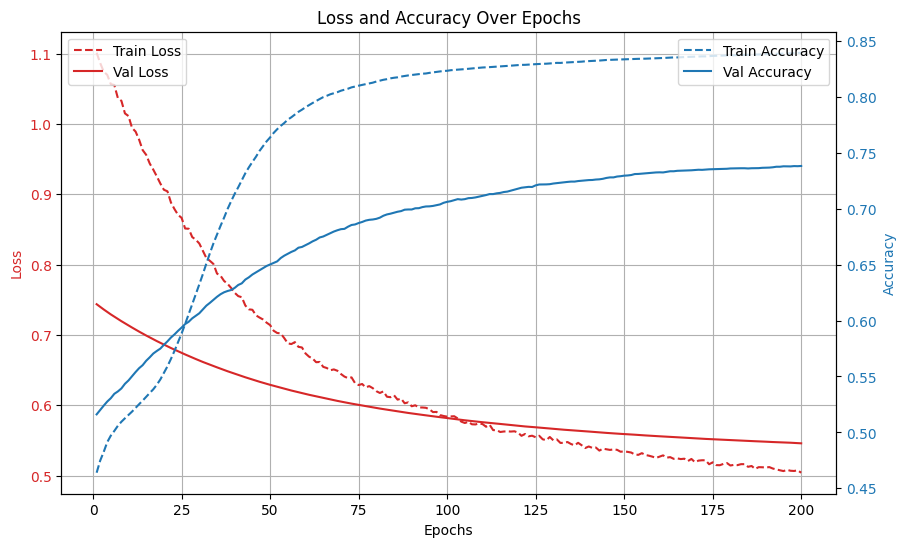

In [ ]:
#plot loss and accuracy
model8.plot_loss_and_accuracy(historyM8)

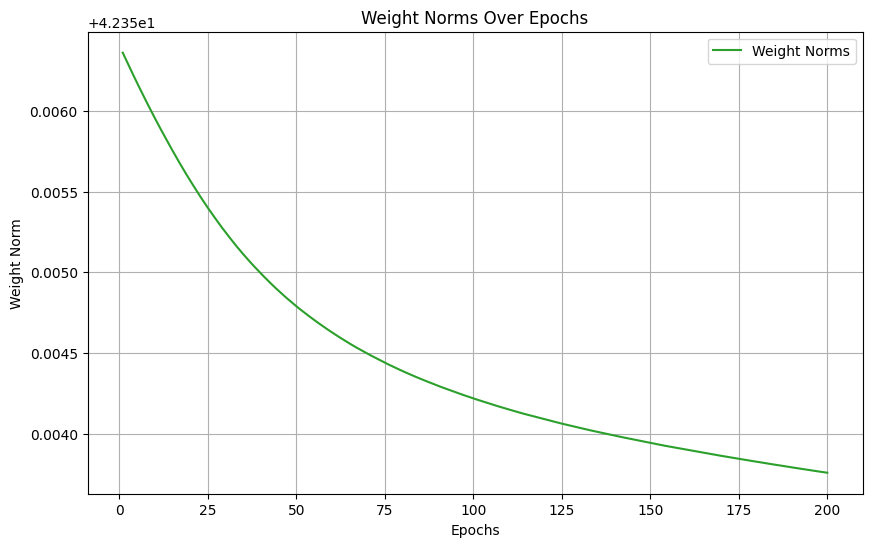

In [ ]:
#plot weights norm
model8.plot_weight_norms(historyM8)

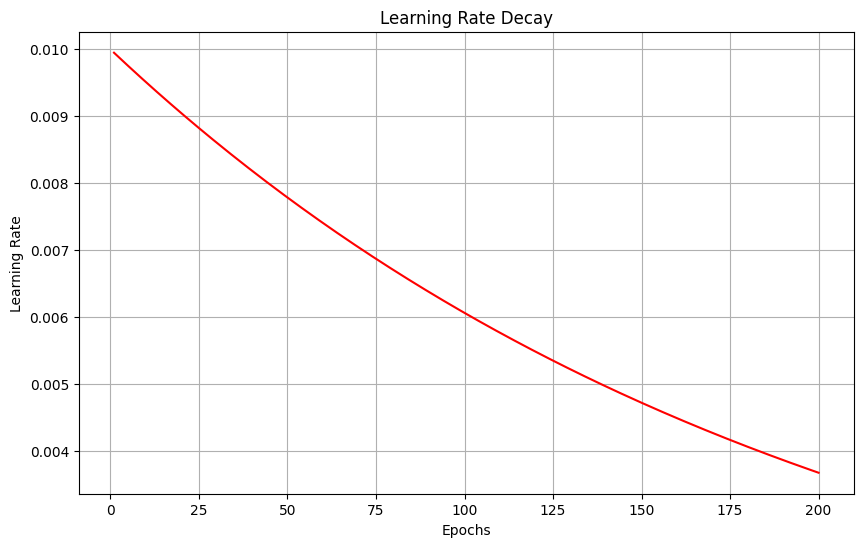

In [ ]:
#plot learning rate
model8.plot_learning_rate(historyM8)

In [ ]:
#get prediction
y_pred_val8 = model8.predict(X_val)
y_pred_val8 = (y_pred_val8 > 0.5).astype(int)
y_pred_val8

array([[0, 0, 0, ..., 1, 0, 0]])

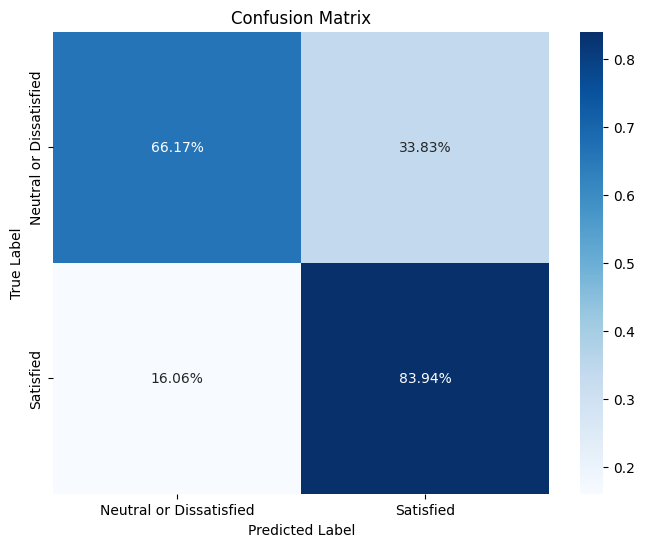


Model 8 - Val Acc: 73.81%


In [ ]:
#get accuracy
accuracy = model8.evaluate(X_val, y_val)
print(f"\nModel 8 - Val Acc: {accuracy * 100:.2f}%")

## **Models Evaluation**

### Model One

In [ ]:
#get predictions on X_test
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5).astype(int)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0]])

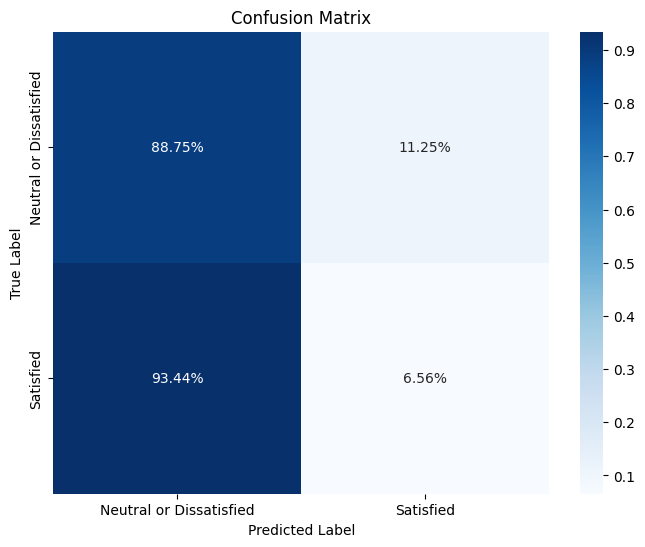


Model 1 - Test Acc: 52.67%


In [ ]:
#evaluate model
accuracy1 = model1.evaluate(X_test, y_test)
print(f"\nModel 1 - Test Acc: {accuracy1 * 100:.2f}%")

In [ ]:
#create a dataframe to store accuracy of models
accuracy_df = pd.DataFrame({"Model": "Model 1", "Accuracy %": [accuracy1 * 100]}, index=[0])
accuracy_df

,Model,Accuracy %
0,Model 1,52.667847


### Model Two

In [ ]:
#get predictions on X_test
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5).astype(int)
y_pred2

array([[0, 1, 0, ..., 0, 0, 0]])

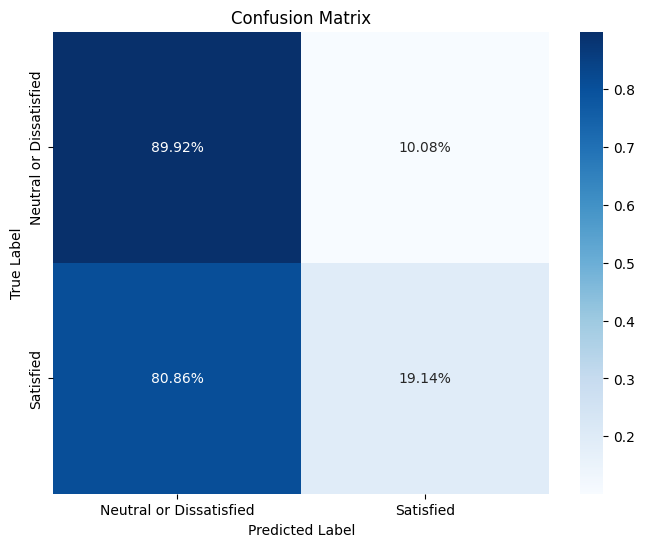


Model 2 - Test Acc: 58.85%


In [ ]:
#evaluate model
accuracy2 = model2.evaluate(X_test, y_test)
print(f"\nModel 2 - Test Acc: {accuracy2 * 100:.2f}%")

In [ ]:
#store model 2 accuracy in accuracy dataframe
accuracy_df.loc[1] = ["Model 2", accuracy2 * 100]
accuracy_df

,Model,Accuracy %
0,Model 1,52.667847
1,Model 2,58.846628


### Model Three

In [ ]:
#get predictions on X_test
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > 0.5).astype(int)
y_pred3

array([[0, 0, 0, ..., 0, 0, 0]])

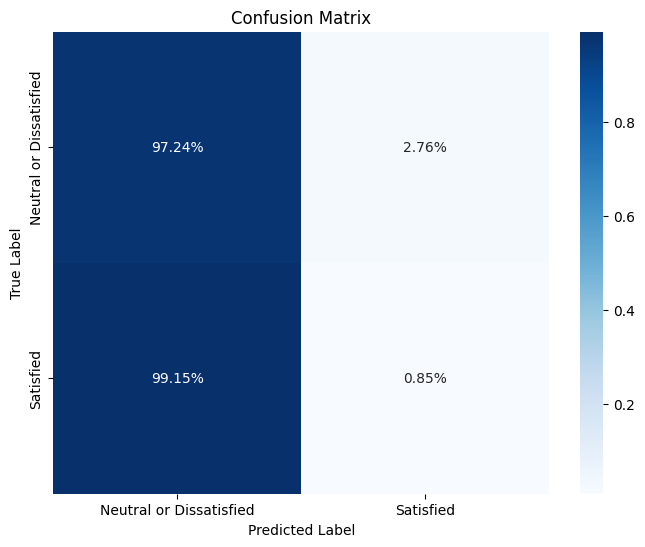


Model 3 - Test Acc: 54.93%


In [ ]:
#evaluate model 3
accuracy3 = model3.evaluate(X_test, y_test)
print(f"\nModel 3 - Test Acc: {accuracy3 * 100:.2f}%")

In [ ]:
#store accuracy of model 3 in accuracy df
accuracy_df.loc[2] = ["Model 3", accuracy3 * 100]
accuracy_df

,Model,Accuracy %
0,Model 1,52.667847
1,Model 2,58.846628
2,Model 3,54.927626


### Model Four

In [ ]:
#get predictions on X_test
y_pred4 = model4.predict(X_test)
y_pred4 = (y_pred4 > 0.5).astype(int)
y_pred4

array([[0, 1, 0, ..., 0, 1, 0]])

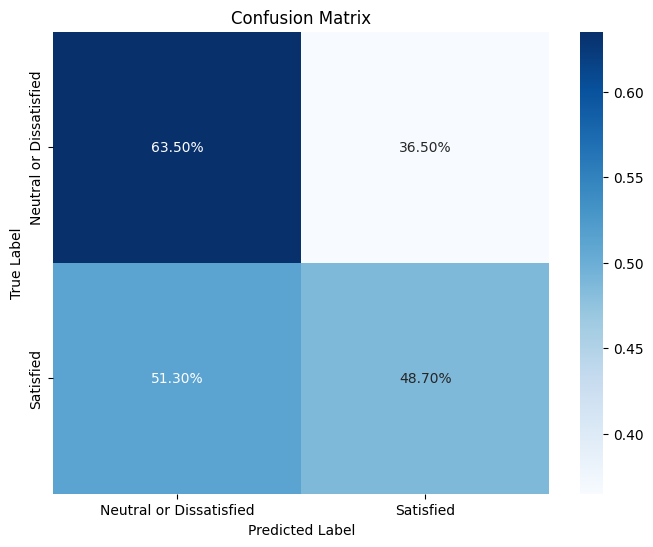


Model 4 - Test Acc: 57.00%


In [ ]:
#evaluate model 4
accuracy4 = model4.evaluate(X_test, y_test)
print(f"\nModel 4 - Test Acc: {accuracy4 * 100:.2f}%")

In [ ]:
#store accuracy of model 4 in accuracy df
accuracy_df.loc[3] = ["Model 4", accuracy4 * 100]
accuracy_df

,Model,Accuracy %
0,Model 1,52.667847
1,Model 2,58.846628
2,Model 3,54.927626
3,Model 4,57.002618


### Model Five

In [ ]:
#get predictions on X_test
y_pred5 = model5.predict(X_test)
y_pred5 = (y_pred5 > 0.5).astype(int)
y_pred5

array([[0, 1, 1, ..., 0, 0, 0]])

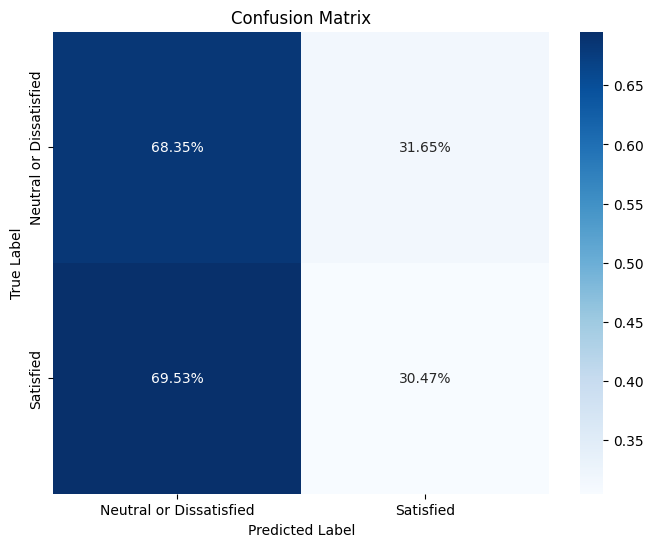


Model 5 - Test Acc: 51.72%


In [ ]:
#evaluate model 5
accuracy5 = model5.evaluate(X_test, y_test)
print(f"\nModel 5 - Test Acc: {accuracy5 * 100:.2f}%")

In [ ]:
#store accuracy of model 5 in accuracy df
accuracy_df.loc[4] = ["Model 5", accuracy5 * 100]
accuracy_df

,Model,Accuracy %
0,Model 1,52.667847
1,Model 2,58.846628
2,Model 3,54.927626
3,Model 4,57.002618
4,Model 5,51.720819


### Model Seven

In [ ]:
#get predictions on X_test
y_pred7 = model7.predict(X_test)
y_pred7 = (y_pred7 > 0.5).astype(int)
y_pred7

array([[1, 1, 0, ..., 0, 1, 0]])

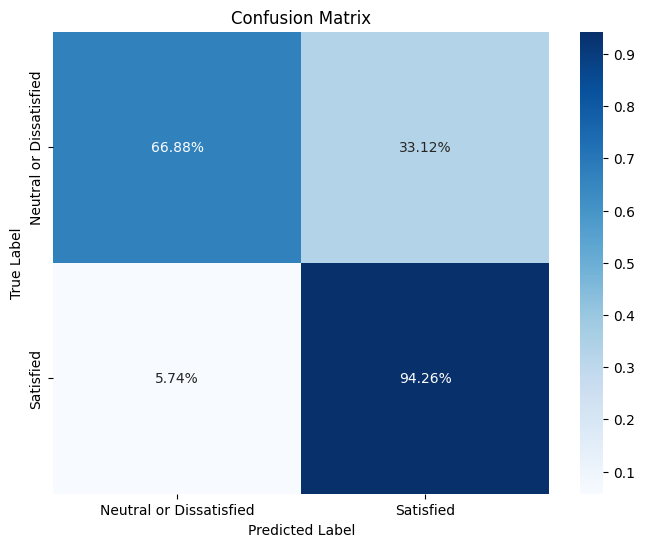


Model 7 - Test Acc: 78.90%


In [ ]:
#evaluate model 7
accuracy7 = model7.evaluate(X_test, y_test)
print(f"\nModel 7 - Test Acc: {accuracy7 * 100:.2f}%")

In [ ]:
#store accuracy of model 7 in accuracy df
accuracy_df.loc[6] = ["Model 7", accuracy7 * 100]
accuracy_df

,Model,Accuracy %
0,Model 1,52.667847
1,Model 2,58.846628
2,Model 3,54.927626
3,Model 4,57.002618
4,Model 5,51.720819
6,Model 7,78.899754


### Model Eight

In [ ]:
#get predictions on X_test
y_pred8 = model8.predict(X_test)
y_pred8 = (y_pred8 > 0.5).astype(int)
y_pred8

array([[0, 1, 0, ..., 0, 1, 0]])

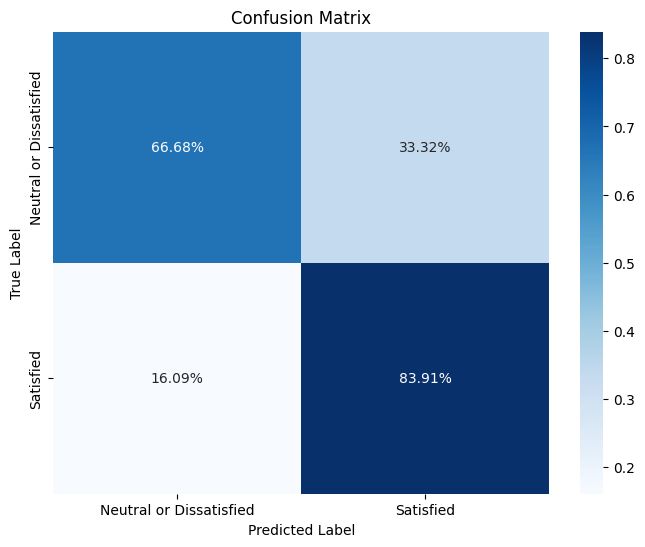


Model 8 - Test Acc: 74.25%


In [ ]:
#evaluate model 8
accuracy8 = model8.evaluate(X_test, y_test)
print(f"\nModel 8 - Test Acc: {accuracy8 * 100:.2f}%")

In [ ]:
#store accuracy of model 8 in accuracy df
accuracy_df.loc[7] = ["Model 8", accuracy8 * 100]
accuracy_df["Accuracy %"] = accuracy_df["Accuracy %"].map('{:.2f}'.format)
accuracy_df

,Model,Accuracy %
0,Model 1,52.67
1,Model 2,58.85
2,Model 3,54.93
3,Model 4,57.00
4,Model 5,51.72
6,Model 7,78.90
7,Model 8,74.25


## **Models Comparison**

In [ ]:
#sort accuracy df
accuracy_df = accuracy_df.sort_values(by="Accuracy %", ascending=True)
accuracy_df

,Model,Accuracy %
4,Model 5,51.72
0,Model 1,52.67
2,Model 3,54.93
3,Model 4,57.00
1,Model 2,58.85
7,Model 8,74.25
6,Model 7,78.90


In [ ]:
#verify dtype of accuracies column
accuracy_df["Accuracy %"].dtype

dtype('O')

In [ ]:
#convert accuracy % column to numeric
accuracy_df['Accuracy %'] = pd.to_numeric(accuracy_df['Accuracy %'], errors='coerce')

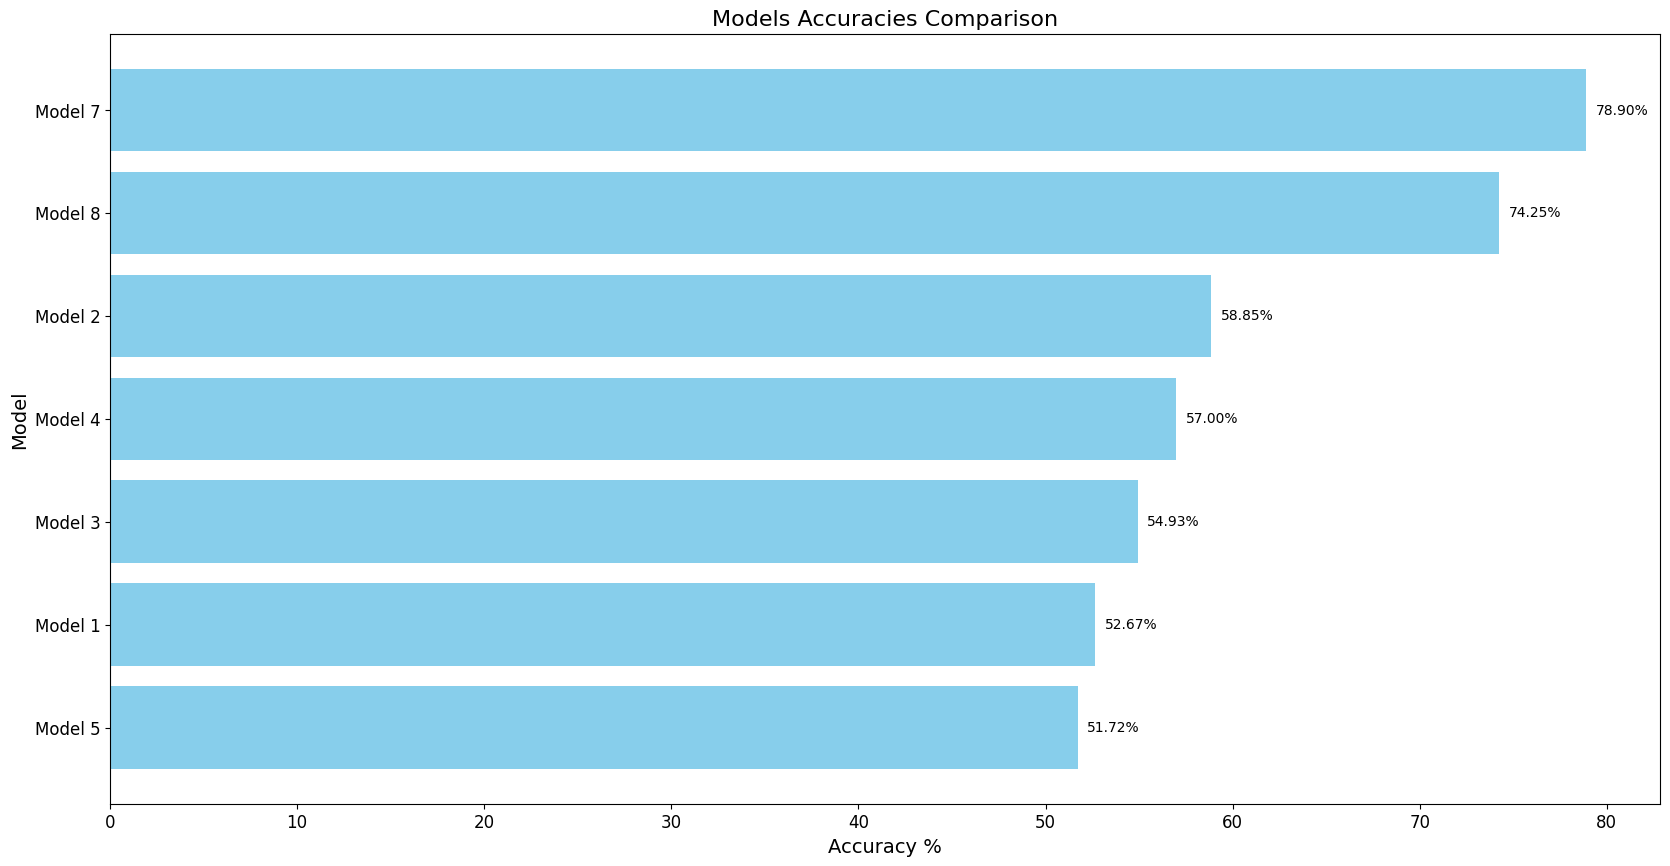

In [ ]:
#display accuracies in a plot
#set fig size
plt.figure(figsize=(20, 10))


#plot horizontal bar chart
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy %'], color='skyblue')

#anotate bars with accuracy values
for index, value in enumerate(accuracy_df['Accuracy %']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center', fontsize=10)

plt.xlabel("Accuracy %", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.title("Models Accuracies Comparison", fontsize=16)

#set tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

## **References**

1. Dataset: Mahal, Teej. "Airline Passenger Satisfaction." Kaggle. https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction.

2. Some portions of the code were adapted from lecture notes provided by Dr. Atif Riaz in the course Programming and Mathematics for Artificial Intelligence.